In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

-   Import des données

In [2]:
df_initial= pd.read_csv('atlas-higgs-challenge-2014-v2.csv')
df_initial.shape

(818238, 35)

-   Separation des données en 3 jeux: train , test , validation

In [3]:
df= df_initial[df_initial.KaggleSet=="t"]
print(f"Le dataset d'entrainement comprend {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Le dataset d'entrainement comprend 250000 lignes et 35 colonnes.


In [4]:
df_test= df_initial[df_initial.KaggleSet=="v"]
print(f"Le dataset de test comprend {df_test.shape[0]} lignes et {df_test.shape[1]} colonnes.")

Le dataset de test comprend 450000 lignes et 35 colonnes.


In [5]:
df_trainalidation= df_initial[df_initial.KaggleSet=="b"]
print(f"Le dataset de validation comprend {df_trainalidation.shape[0]} lignes et {df_trainalidation.shape[1]} colonnes.")

Le dataset de validation comprend 100000 lignes et 35 colonnes.


# Partie 1: Analyse des données (EDA)

In [6]:
df.head(10)

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   
5   100005        89.744                       13.550        59.149   116.344   
6   100006       148.754                       28.862       107.782   106.130   
7   100007       154.916                       10.418        94.714    29.169   
8   100008       105.594                       50.559       100.989     4.288   
9   100009       128.053                       88.941        69.272   193.392   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                 0.910           124.711                2.666   
1              -999.000          -999.000             -999.000   
2              -999.000          -999.000             -999.000   
3              -999.000          -999.000             -999.000   
4              -999.000          -999.000             -999.000   
5                 2.636           284.584               -0.540   
6                 0.733           158.359                0.113   
7              -999.000          -999.000             -999.000   
8              -999.000          -999.000             -999.000   
9              -999.000          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_leading_eta  \
0               3.064      41.928  ...                2.150   
1               3.473       2.078  ...                0.725   
2               3.148       9.336  ...                2.053   
3               3.310       0.414  ...             -999.000   
4               3.891      16.405  ...             -999.000   
5               1.362      61.619  ...               -2.412   
6               2.941       2.545  ...                0.864   
7               2.897       1.526  ...               -0.715   
8               2.904       4.288  ...             -999.000   
9               1.609      28.859  ...               -2.767   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                0.444                 46.062                   1.240   
1                1.158               -999.000                -999.000   
2               -2.028               -999.000                -999.000   
3             -999.000               -999.000                -999.000   
4             -999.000               -999.000                -999.000   
5               -0.653                 56.165                   0.224   
6                1.450                 56.867                   0.131   
7               -1.724               -999.000                -999.000   
8             -999.000               -999.000                -999.000   
9               -2.514               -999.000                -999.000   

   PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  Label  KaggleSet  \
0                  -2.475         113.497  0.000814      s          t   
1                -999.000          46.226  0.681042      b          t   
2                -999.000          44.251  0.715742      b          t   
3                -999.000          -0.000  1.660654      b          t   
4                -999.000           0.000  1.904263      b          t   
5                   3.106         193.660  0.025434      b          t   
6                  -2.767         179.877  0.000814      s          t   
7                -999.000          30.638  0.005721      s          t   
8                -999.000           0.000  1.614803      b          t   
9                -999.000         167.735  0.000461      s          t   

   KaggleWeight  
0      0.002653  
1      2.233584  
2      2.347389  
3      5.4

- **Suppression des colonnes inutiles**  

On supprime les colonnes Weight,KaggleWeight, KaggleSet qui ne nous sert plus ainsi que la colonne EventId qui est juste un identifiant de l evenement.

In [7]:
df.drop(["Weight","KaggleSet","KaggleWeight","EventId"], axis=1,inplace=True)
df.shape

(250000, 31)

- **Type des variables**

In [8]:
# Types des variables 
df.dtypes

DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta            float64
PRI_jet_leading_phi      

Hormis la variable "**Label**" toutes les variables sont numériques. Une seule est de type integer ("**PRI_jet_num**")

In [9]:
df.nunique()

DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7087
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_leading_phi              6285
PRI_jet_subl

- La variable "**Label**" est composée de 2 classes 
- la variable "**PRI_jet_num**" de 4 modalités

-   **Recherche des doublons**

In [10]:
print(df.duplicated().unique())

[False]


Après vérification, on constate que la base est composée d'enregistrements uniques. Pas de doublons

-   **Recherche des valeurs manquantes**

In [11]:
df.isnull().sum().sort_values(ascending=False)

DER_mass_MMC                   0
PRI_lep_pt                     0
PRI_jet_all_pt                 0
PRI_jet_subleading_phi         0
PRI_jet_subleading_eta         0
PRI_jet_subleading_pt          0
PRI_jet_leading_phi            0
PRI_jet_leading_eta            0
PRI_jet_leading_pt             0
PRI_jet_num                    0
PRI_met_sumet                  0
PRI_met_phi                    0
PRI_met                        0
PRI_lep_phi                    0
PRI_lep_eta                    0
PRI_tau_phi                    0
DER_mass_transverse_met_lep    0
PRI_tau_eta                    0
PRI_tau_pt                     0
DER_lep_eta_centrality         0
DER_met_phi_centrality         0
DER_pt_ratio_lep_tau           0
DER_sum_pt                     0
DER_pt_tot                     0
DER_deltar_tau_lep             0
DER_prodeta_jet_jet            0
DER_mass_jet_jet               0
DER_deltaeta_jet_jet           0
DER_pt_h                       0
DER_mass_vis                   0
Label     

Le dataset ne semble pas presenter de données manquantes, cependant il est precisé dans le contexte du challenge qu'il peut arriver que pour certaines entrées, certaines variables n'aient pas de sens ou ne puissent pas être calculées ; dans ce cas, leur valeur est de −999.0, ce qui est en dehors de la plage normale de toutes les variables.  
Pour poursuivre l analyse des données et ne pas fausser les statistiques (moyenne, médiane) on remplace provisoirement -999 par NaN.

In [12]:
# on remplace donc -999 par NaN
df=df.replace(-999,np.nan)

In [13]:
# Recherche des données manquantes
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent %'])
missing_data = pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent %'])
missing_data
#print("Il n y a pas de données manquantes")

Total  Percent %
PRI_jet_subleading_pt        177457      70.98
DER_lep_eta_centrality       177457      70.98
PRI_jet_subleading_phi       177457      70.98
DER_deltaeta_jet_jet         177457      70.98
DER_mass_jet_jet             177457      70.98
DER_prodeta_jet_jet          177457      70.98
PRI_jet_subleading_eta       177457      70.98
PRI_jet_leading_eta           99913      39.97
PRI_jet_leading_pt            99913      39.97
PRI_jet_leading_phi           99913      39.97
DER_mass_MMC                  38114      15.25
PRI_lep_phi                       0       0.00
PRI_jet_all_pt                    0       0.00
PRI_jet_num                       0       0.00
PRI_met_sumet                     0       0.00
PRI_met_phi                       0       0.00
PRI_met                           0       0.00
PRI_tau_phi                       0       0.00
PRI_lep_eta                       0       0.00
PRI_lep_pt                        0       0.00
DER_mass_transverse_met_lep       0       0.00
PRI_tau_eta                       0       0.00
PRI_tau_pt                        0       0.00
DER_met_phi_centrality            0       0.00
DER_pt_ratio_lep_tau              0       0.00
DER_sum_pt                        0       0.00
DER_pt_tot                        0       0.00
DER_deltar_tau_lep                0       0.00
DER_pt_h                          0       0.00
DER_mass_vis                      0       0.00
Label                             0       0.00

On observe maintenant 7 variables dont 71% des données sont manquantes, 3 dont 40% sont manquantes et une dont 15% des données sont manquantes.
En regardant le "dataset semantics" sur le site du Cern, on peut lire que les variables presentant des données non definies sont liées à la variable **PRI_jet_num** qui correnspond au nombre de jet et qui peut prendre 4 modalités 0,1,2 ou 3. Ainsi les valeurs de:
-  **DER_deltaeta_jet_jet**, **DER_mass_jet_jet**, **DER_prodeta_jet_jet**,**DER_lep_eta_centrality**,**PRI_jet_subleading_pt**, **PRI_jet_subleading_eta** et **PRI_jet_subleading_phi** sont non definies si **PRI_jet_num ≤ 1**  

-  celles de **PRI_jet_leading_eta**, **PRI_jet_leading_phi** sont non definies si **PRI_jet_num ≤ 0**  

Nous reviendrons ulterieurement, après l'analyses des données, sur les traitements à appliquer à ces données manquantes 

- **Variable Label:  Repartition des évenements par classes**

In [14]:
df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

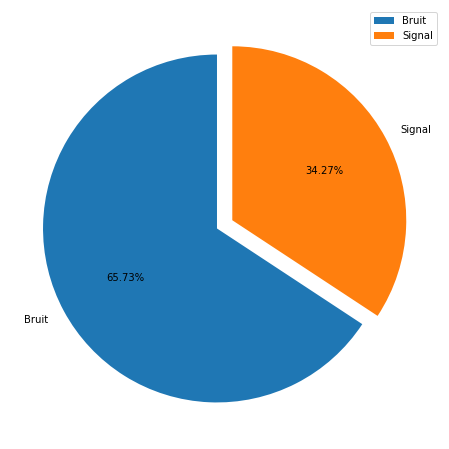

In [15]:
# Réalisation d un graphique montrant la répartition des evenement au sein des classes.
size = [164333,85667]
colors = ['#1f77b4','#ff7f0e']
labels = "Bruit","Signal"
explode = [0.05, 0.05]


plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels,explode = explode, startangle=90, autopct = '%.2f%%') 
plt.title("", fontsize = 30)
plt.axis('off')
p = plt.gcf()
plt.legend()
plt.show()

La repartition des évenements est d environ 1/3 de signal pour 2/3 de bruit

- **Encodage de la variable classe : Label**

Nous encodons tout de suite la variable Label pour la transformer en variable numerique (int). cette etape indispensable pour l'entrainement de notre modele facilitera egalement notre exploration de données


In [16]:
# creation d'une fonction pour transformer le label en variable numérique
def label2numeric(x):
    """
    Fonction permetantt de transformer le label en variable numerique.
        - 0 pour le label bruit (b)
        - 1 pour le signal (s)
    """
    if x=="b":
        return(0)
    else:
        return(1)

In [17]:
# transformation de la variable de classe en variables numérique
df.Label= df.Label.apply(label2numeric)
df.Label.value_counts()

0    164333
1     85667
Name: Label, dtype: int64

## Analyse Univariée

In [18]:
df.describe().T

count        mean         std     min  \
DER_mass_MMC                 211886.0  121.858528   57.298157   9.044   
DER_mass_transverse_met_lep  250000.0   49.239819   35.344886   0.000   
DER_mass_vis                 250000.0   81.181982   40.828691   6.329   
DER_pt_h                     250000.0   57.895962   63.655682   0.000   
DER_deltaeta_jet_jet          72543.0    2.403735    1.742226   0.000   
DER_mass_jet_jet              72543.0  371.783360  397.699325  13.602   
DER_prodeta_jet_jet           72543.0   -0.821688    3.584362 -18.066   
DER_deltar_tau_lep           250000.0    2.373100    0.782911   0.208   
DER_pt_tot                   250000.0   18.917332   22.273494   0.000   
DER_sum_pt                   250000.0  158.432217  115.706115  46.104   
DER_pt_ratio_lep_tau         250000.0    1.437609    0.844743   0.047   
DER_met_phi_centrality       250000.0   -0.128305    1.193585  -1.414   
DER_lep_eta_centrality        72543.0    0.458290    0.398681   0.000   
PRI_tau_pt                   250000.0   38.707419   22.412081  20.000   
PRI_tau_eta                  250000.0   -0.010973    1.214079  -2.499   
PRI_tau_phi                  250000.0   -0.008171    1.816763  -3.142   
PRI_lep_pt                   250000.0   46.660207   22.064922  26.000   
PRI_lep_eta                  250000.0   -0.019507    1.264982  -2.505   
PRI_lep_phi                  250000.0    0.043543    1.816611  -3.142   
PRI_met                      250000.0   41.717235   32.894693   0.109   
PRI_met_phi                  250000.0   -0.010119    1.812223  -3.142   
PRI_met_sumet                250000.0  209.797178  126.499506  13.678   
PRI_jet_num                  250000.0    0.979176    0.977426   0.000   
PRI_jet_leading_pt           150087.0   84.822105   60.662276  30.000   
PRI_jet_leading_eta          150087.0   -0.003275    1.784546  -4.499   
PRI_jet_leading_phi          150087.0   -0.012393    1.813385  -3.142   
PRI_jet_subleading_pt         72543.0   57.679474   31.985782  30.000   
PRI_jet_subleading_eta        72543.0   -0.011845    2.031743  -4.500   
PRI_jet_subleading_phi        72543.0   -0.001582    1.816950  -3.142   
PRI_jet_all_pt               250000.0   73.064591   98.015662   0.000   
Label                        250000.0    0.342668    0.474603   0.000   

                                   25%       50%        75%       max  
DER_mass_MMC                  91.88525  112.4060  135.48200  1192.026  
DER_mass_transverse_met_lep   19.24100   46.5240   73.59800   690.075  
DER_mass_vis                  59.38875   73.7520   92.25900  1349.351  
DER_pt_h                      14.06875   38.4675   79.16900  2834.999  
DER_deltaeta_jet_jet           0.88250    2.1070    3.69000     8.503  
DER_mass_jet_jet             111.97700  225.8850  478.22600  4974.979  
DER_prodeta_jet_jet           -2.62900   -0.2440    0.95800    16.690  
DER_deltar_tau_lep             1.81000    2.4915    2.96100     5.684  
DER_pt_tot                     2.84100   12.3155   27.59100  2834.999  
DER_sum_pt                    77.55000  120.6645  200.47825  1852.462  
DER_pt_ratio_lep_tau           0.88300    1.2800    1.77700    19.773  
DER_met_phi_centrality        -1.37100   -0.3560    1.22500     1.414  
DER_lep_eta_centrality         0.00400    0.4540    0.87900     1.000  
PRI_tau_pt                    24.59175   31.8040   45.01700   764.408  
PRI_tau_eta                   -0.92500   -0.0230    0.89800     2.497  
PRI_tau_phi                   -1.57500   -0.0330    1.56500     3.142  
PRI_lep_pt                    32.37500   40.5160   53.39000   560.271  
PRI_lep_eta                   -1.01400   -0.0450    0.95900     2.503  
PRI_lep_phi                   -1.52200    0.0860    1.61800     3.142  
PRI_met                       21.39800   34.8020   51.89500  2842.617  
PRI_met_phi                   -1.57500   -0.0240    1.56100     3.142  
PRI_met_sumet                123.01750  179.7390  263.37925  2003.976  
PRI_jet_num                    0.00000 

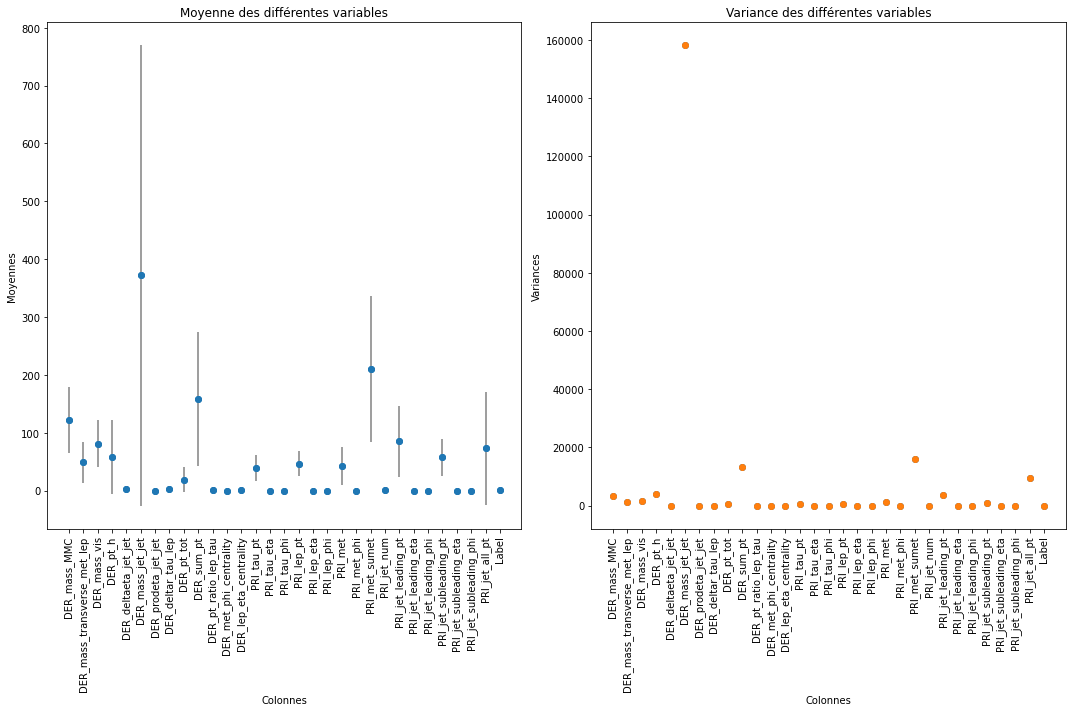

In [19]:
# Calculer les moyennes, écarts-types et variances de chaque colonne
means = df.mean()
stds = df.std()
variances = df.var()

# Définition de la zone de tracage des graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Tracer le graphique à points pour les moyennes
axs[0].scatter(means.index, means.values)
axs[0].errorbar(means.index, means.values, yerr=stds.values, fmt='o', ecolor='gray') # Pour ajouter les  barres d' ecart-types
axs[0].set_xlabel("Colonnes")
axs[0].set_ylabel("Moyennes")
axs[0].set_title("Moyenne des différentes variables")
axs[0].set_xticklabels(means.index, rotation=90)

# Tracer le graphique à points pour les variances
axs[1].scatter(variances.index, variances.values)
axs[1].scatter(variances.index, variances.values)
axs[1].set_xlabel("Colonnes")
axs[1].set_ylabel("Variances")
axs[1].set_title("Variance des différentes variables")
axs[1].set_xticklabels(variances.index, rotation=90)

plt.tight_layout() # evite superposositions dse légende
plt.show()

Les graphiques ci dessus donne une indication sur la moyenne et la variance  de chaque variable. A priori, Une variable avec une variance importante peut être plus informative pour l'apprentissage de notre modèle car elle dispose d'une plus grande variabilité dans les données. Cependant, cela ne signifie pas nécessairement qu'elle est plus importante pour la prédiction de la variable cible. L'etude des correlations pourra dire si ces variables sont reellement interessantes.  
Retenons les variables :  
**DER_mass_jet_jet**   
**DER_sum_pt**   
**PRI_met_sumet**   
**PRI_jet_all_pt**

-   **Nuage de points**

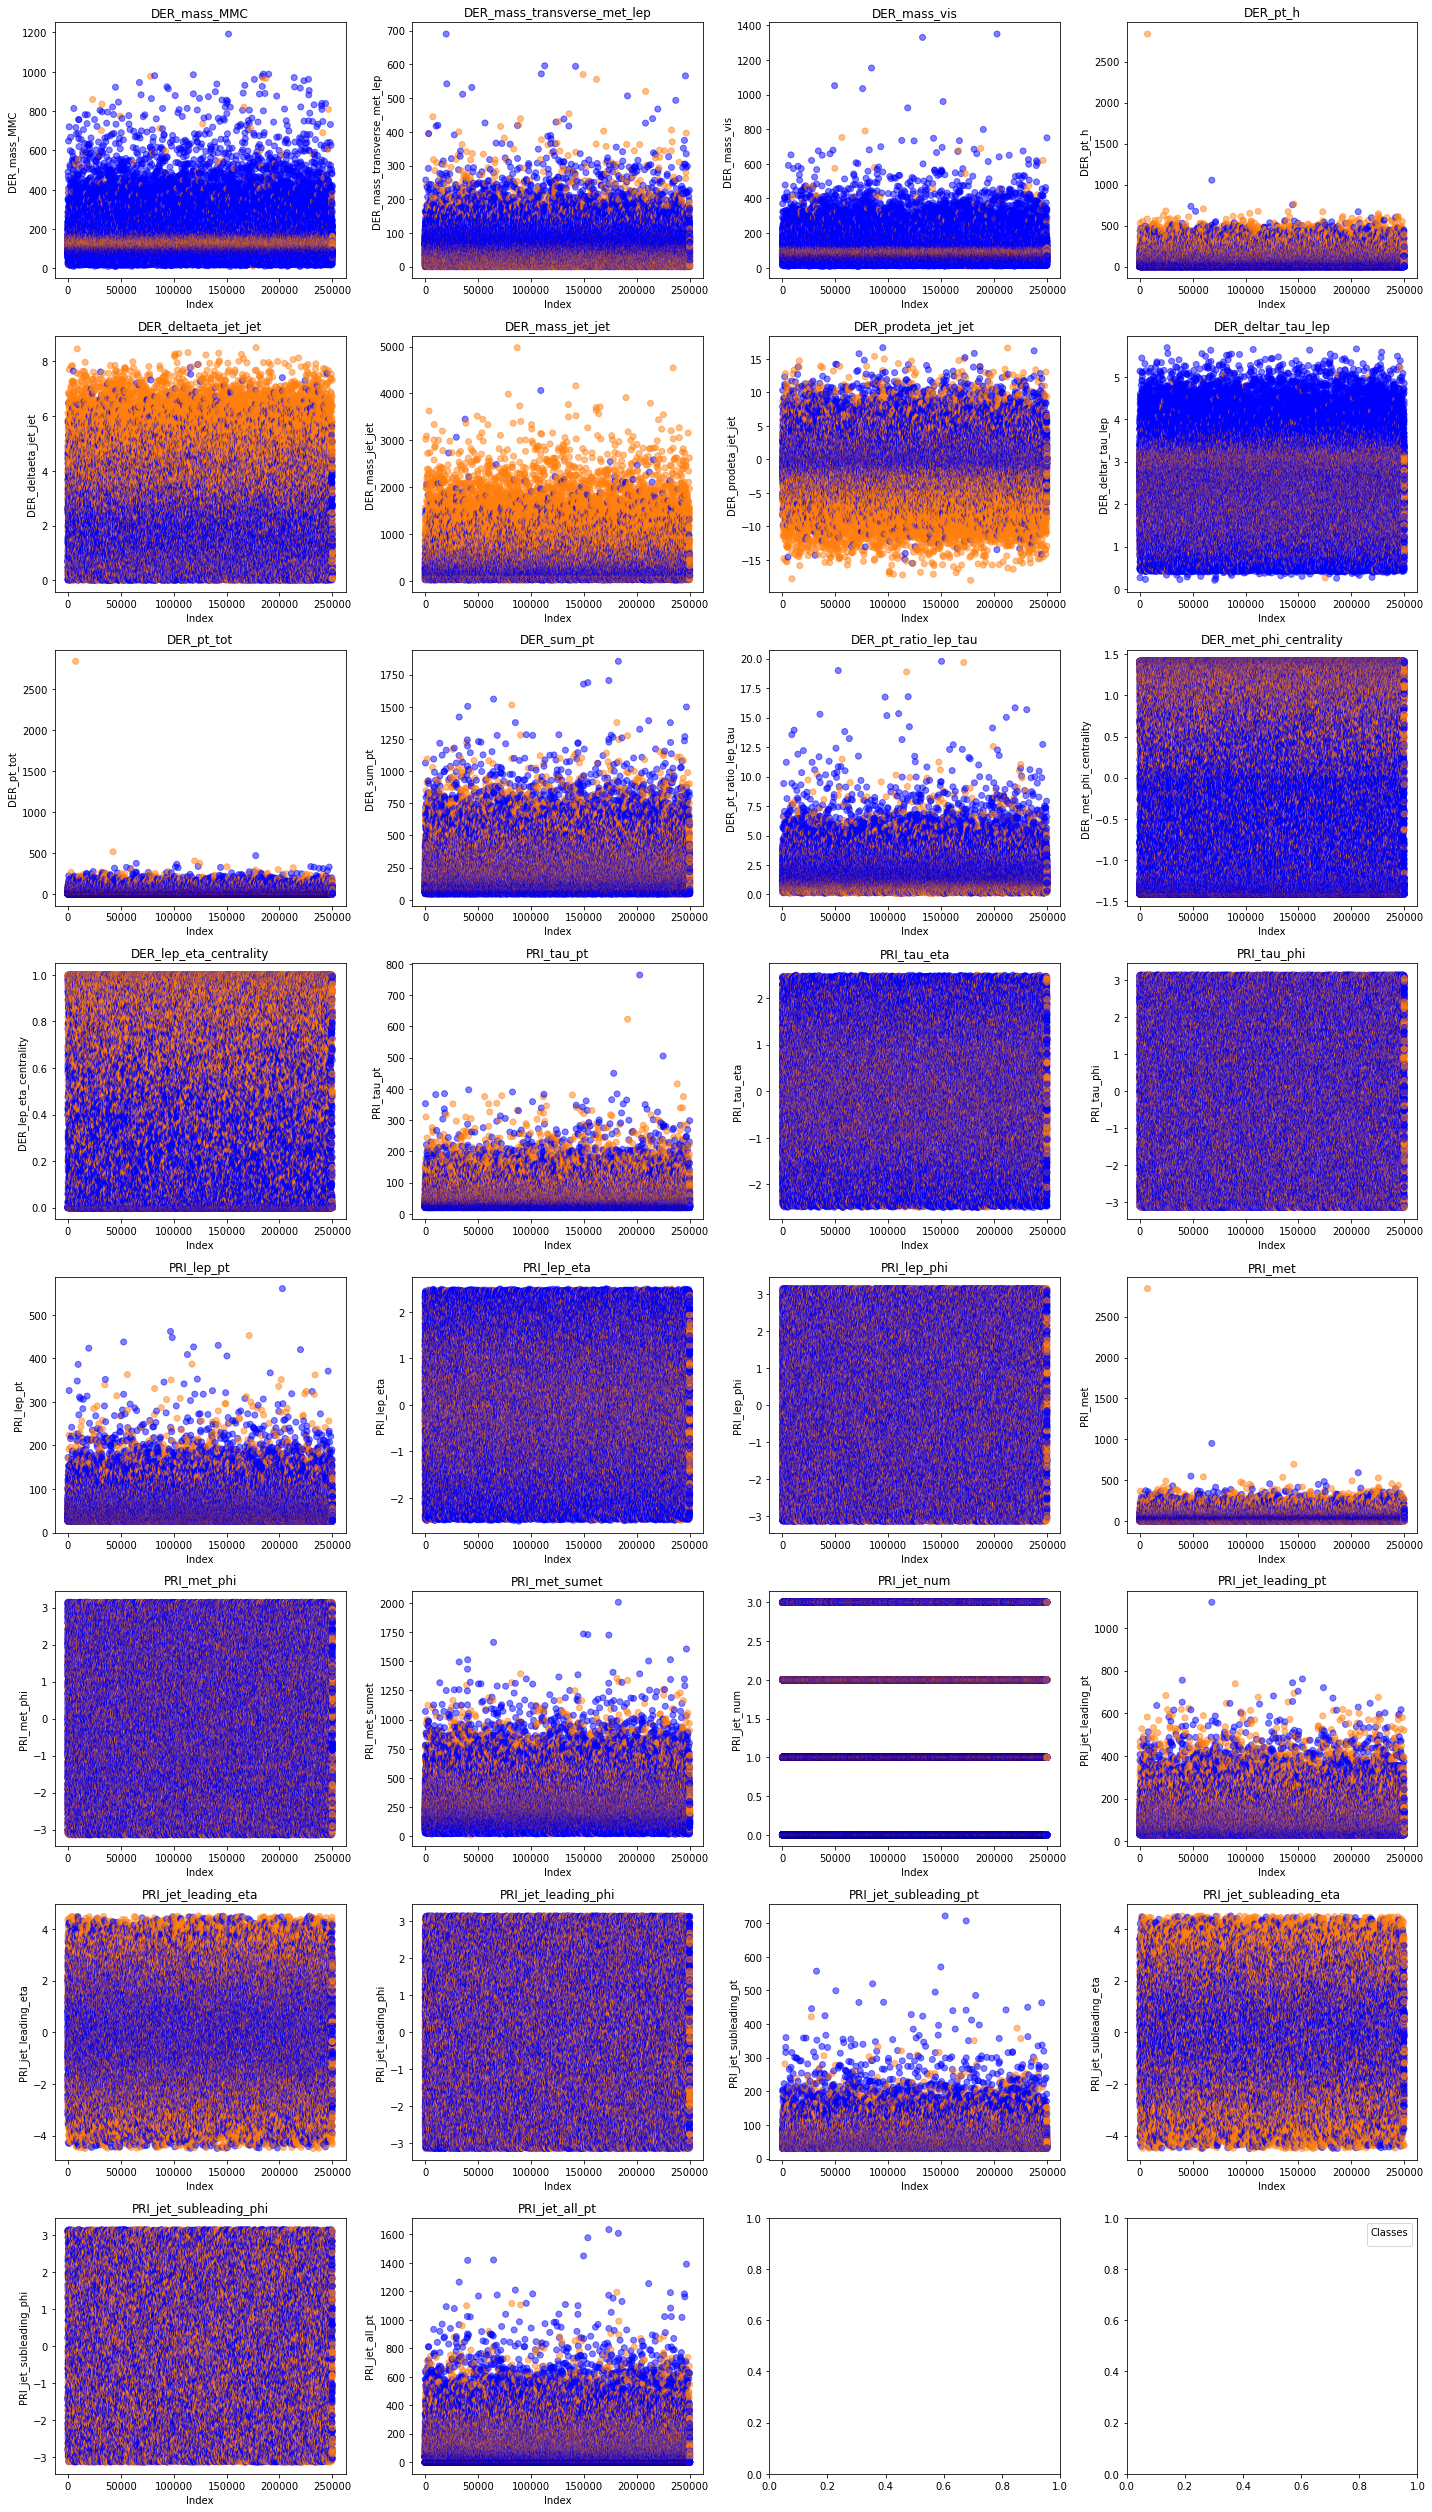

In [20]:
# Selection des colonnes (on supprime la variable de classe Label)
col_names = df.columns[:-1]


# Définition de la zone de tracage des graphiques
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 35))

colors = df.Label.map({0: "blue", 1: "#ff7f0e"})

# Boucle pour tracer les graphiques
for i, col_name in enumerate(col_names):
    ax = axs[i//ncols, i%ncols]
    ax.scatter(df.index, df[col_name], c= colors, alpha=0.5)
    ax.set_title(col_name)
    ax.set_xlabel("Index")
    ax.set_ylabel(col_name)

plt.tight_layout()
# Ajout de la légende des couleurs
plt.legend(["0", "1"], title="Classes")
plt.show()

Les nuages de points nous permettent de visualiser comment les événements sont répartis pour chaque variable. La coloration des points en fonction de leur appartenance à tel ou tel label permet de reperer visuellement les variables qui permette de discriminer .  
- Pour certaines variables la répatition des evenements est tres homogène et ne semble pas permettre une separation aisée entre les evenements Bruit et Signal. Ces variables ne sont a priori pas tres interessantes pour l apprentissage de notre model. C'est le cas par exemple de:  
**PRI-tau_phi**   
**PRI_lep_phi**   
**PRI_met_phi**   
**PRI_jet_leading_phi**.  
**PRI_jet_subleading_phi**
  
  
- A l inverse, certaine variables semble indiquer une repartion plus nette des points selon leur label. Ces variables sont interessantes à utiliser dans notre model.Citons par exemple :  
**DER_masse_MMC**  
**DER_mass_vis**   
**DER_deltaeta_jet_jet**  
**DER_mass_jet_jet**  
**DER_lep_eta_centrality**  
**PRI_jet_subleading_eta**  
 
il faut toutefois rester prudent puisque la variation de densité des points (répartition) peut induire des erreurs de perception  .


- **Histogramme** 

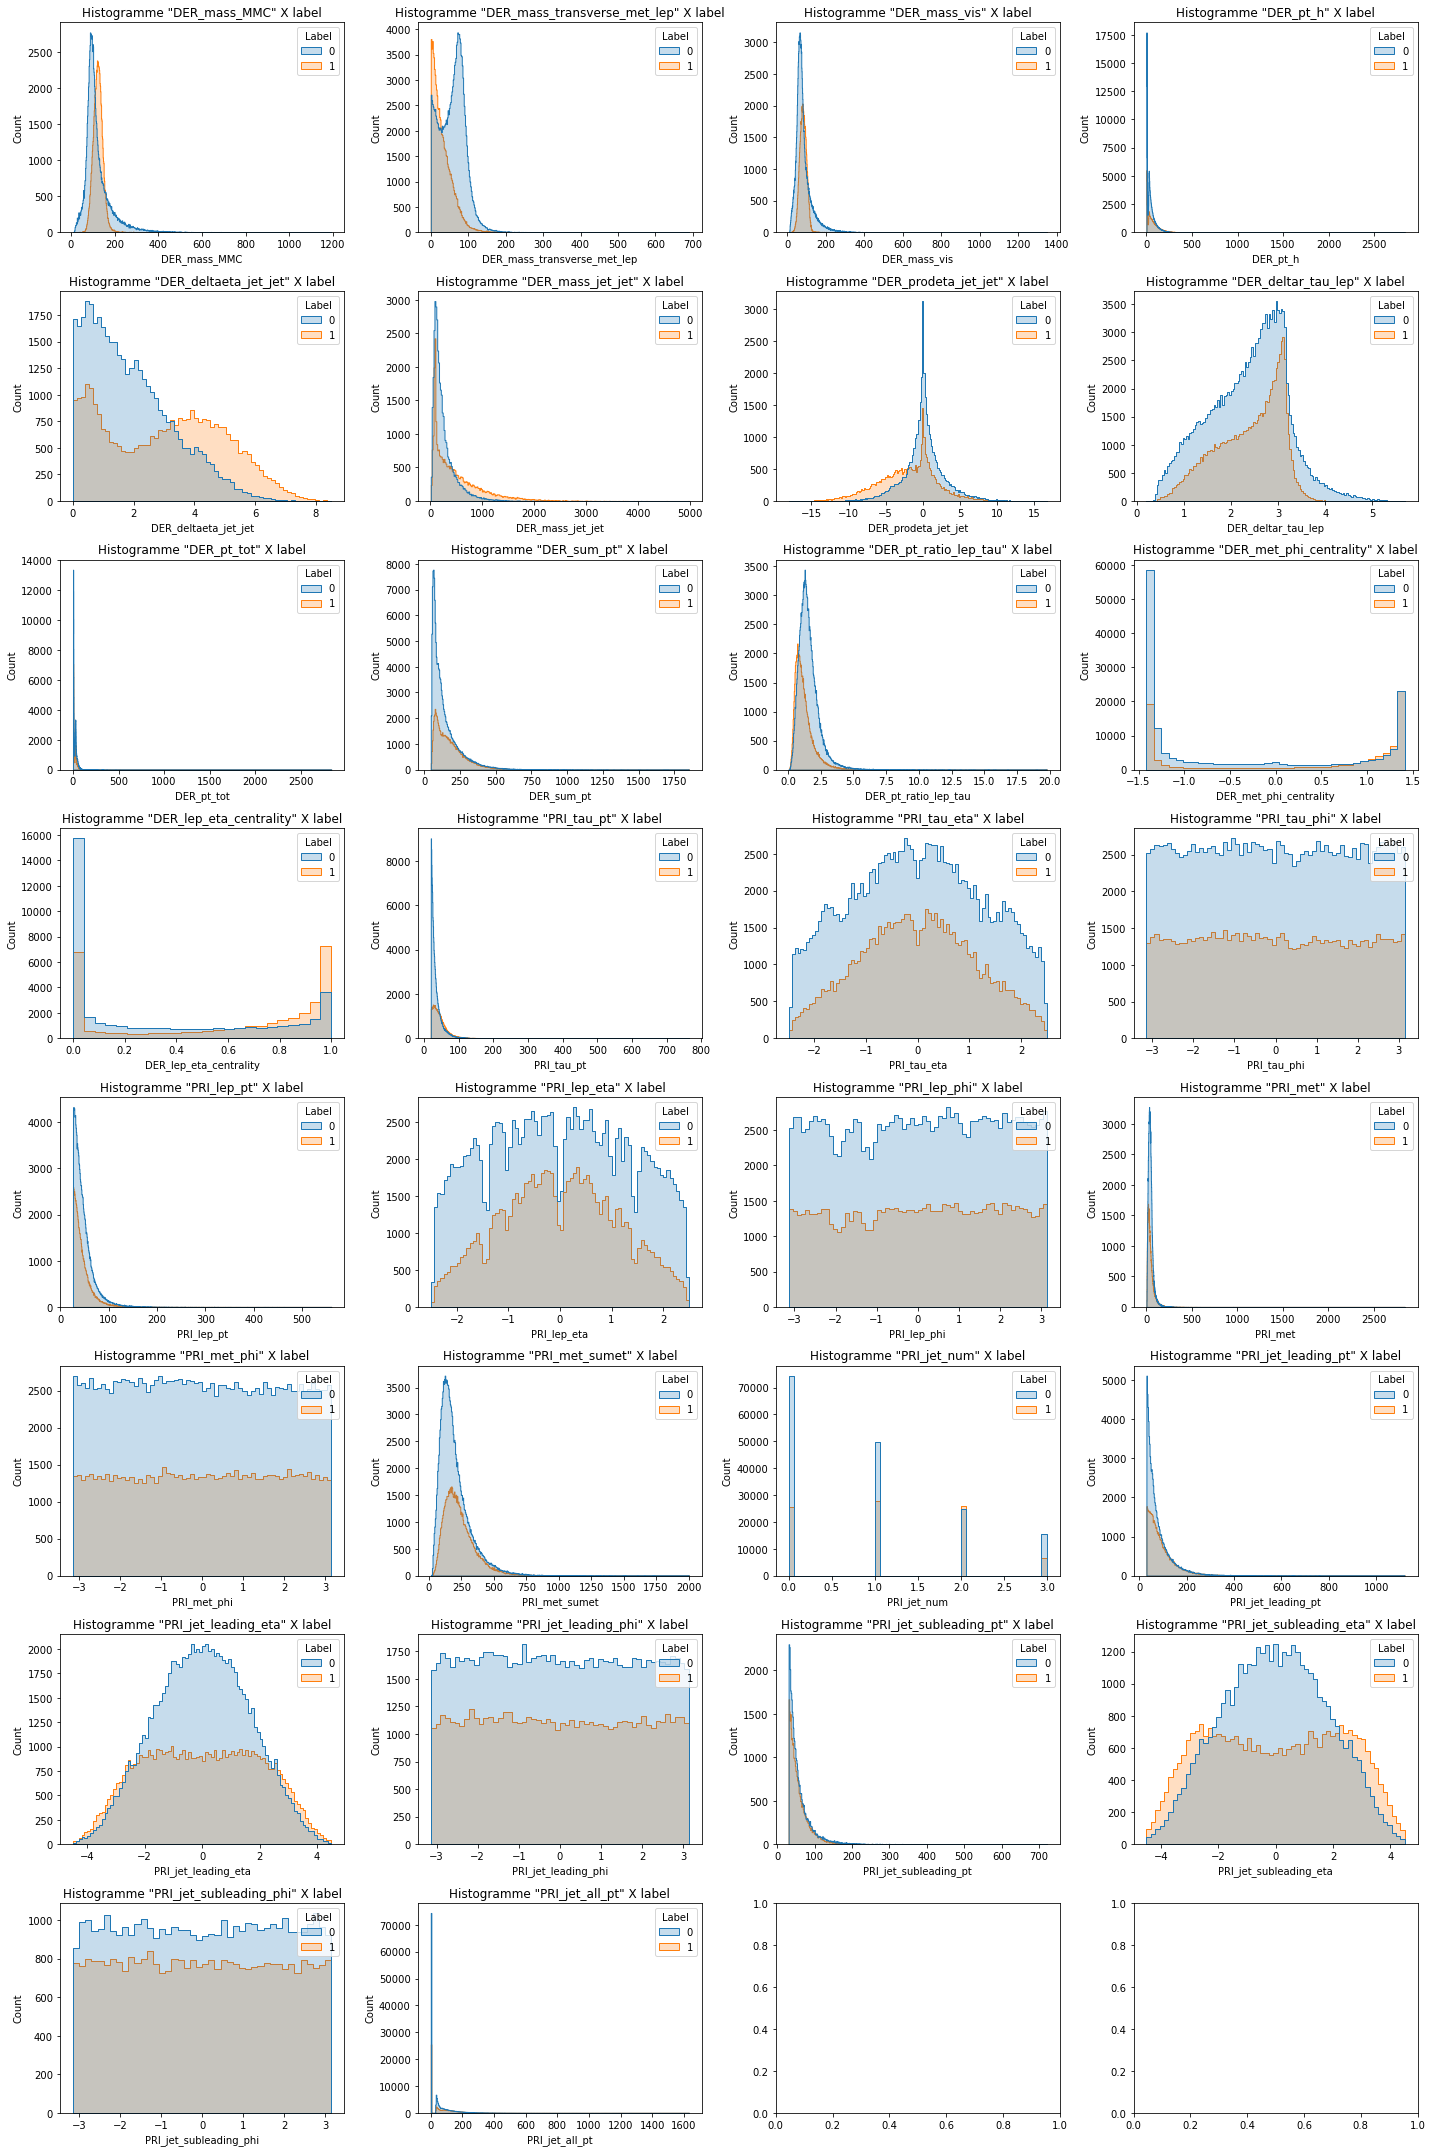

In [21]:
#Selection des colonnes (on supprime la variable de classe Label)
col_names = df.columns[:-1]

# Définition de la zone de tracage des graphiques
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

# Boucle pour tracer les graphiques
for i, col in enumerate(col_names):
    ax = axs[i//ncols, i%ncols]
    sns.histplot(data=df, x=col, hue='Label', element='step',ax=ax)
    ax.set_title(f'Histogramme "{col}" X label')


plt.tight_layout() # evite les superpositions de légendes
plt.show()

Les graphiques ci dessus nous permettent de voir la distribution de chaques variables avec la repartition des evenements entre bruit et signal. On peut voir ainsi les variables qui pourraient permettre de séparer les 2 labels en ayant des distributions qui ne se superposent pas entièrement. c'est le cas par exemple des variables : DER_mass_MMC , DER_mass_transverse_met_lep, DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_lep_eta_centrality ...  
A l opposé certaines variables ont des distributions qui se chevauchent  et qui conservent tout le temps le meme ratio Bruit/Signal. Par exemple  : PRI_tau_eta, PRI_tau_phi, PRI_lep_eta, PRI_lep_phi et PRI_met_phi

- **Boxplot**

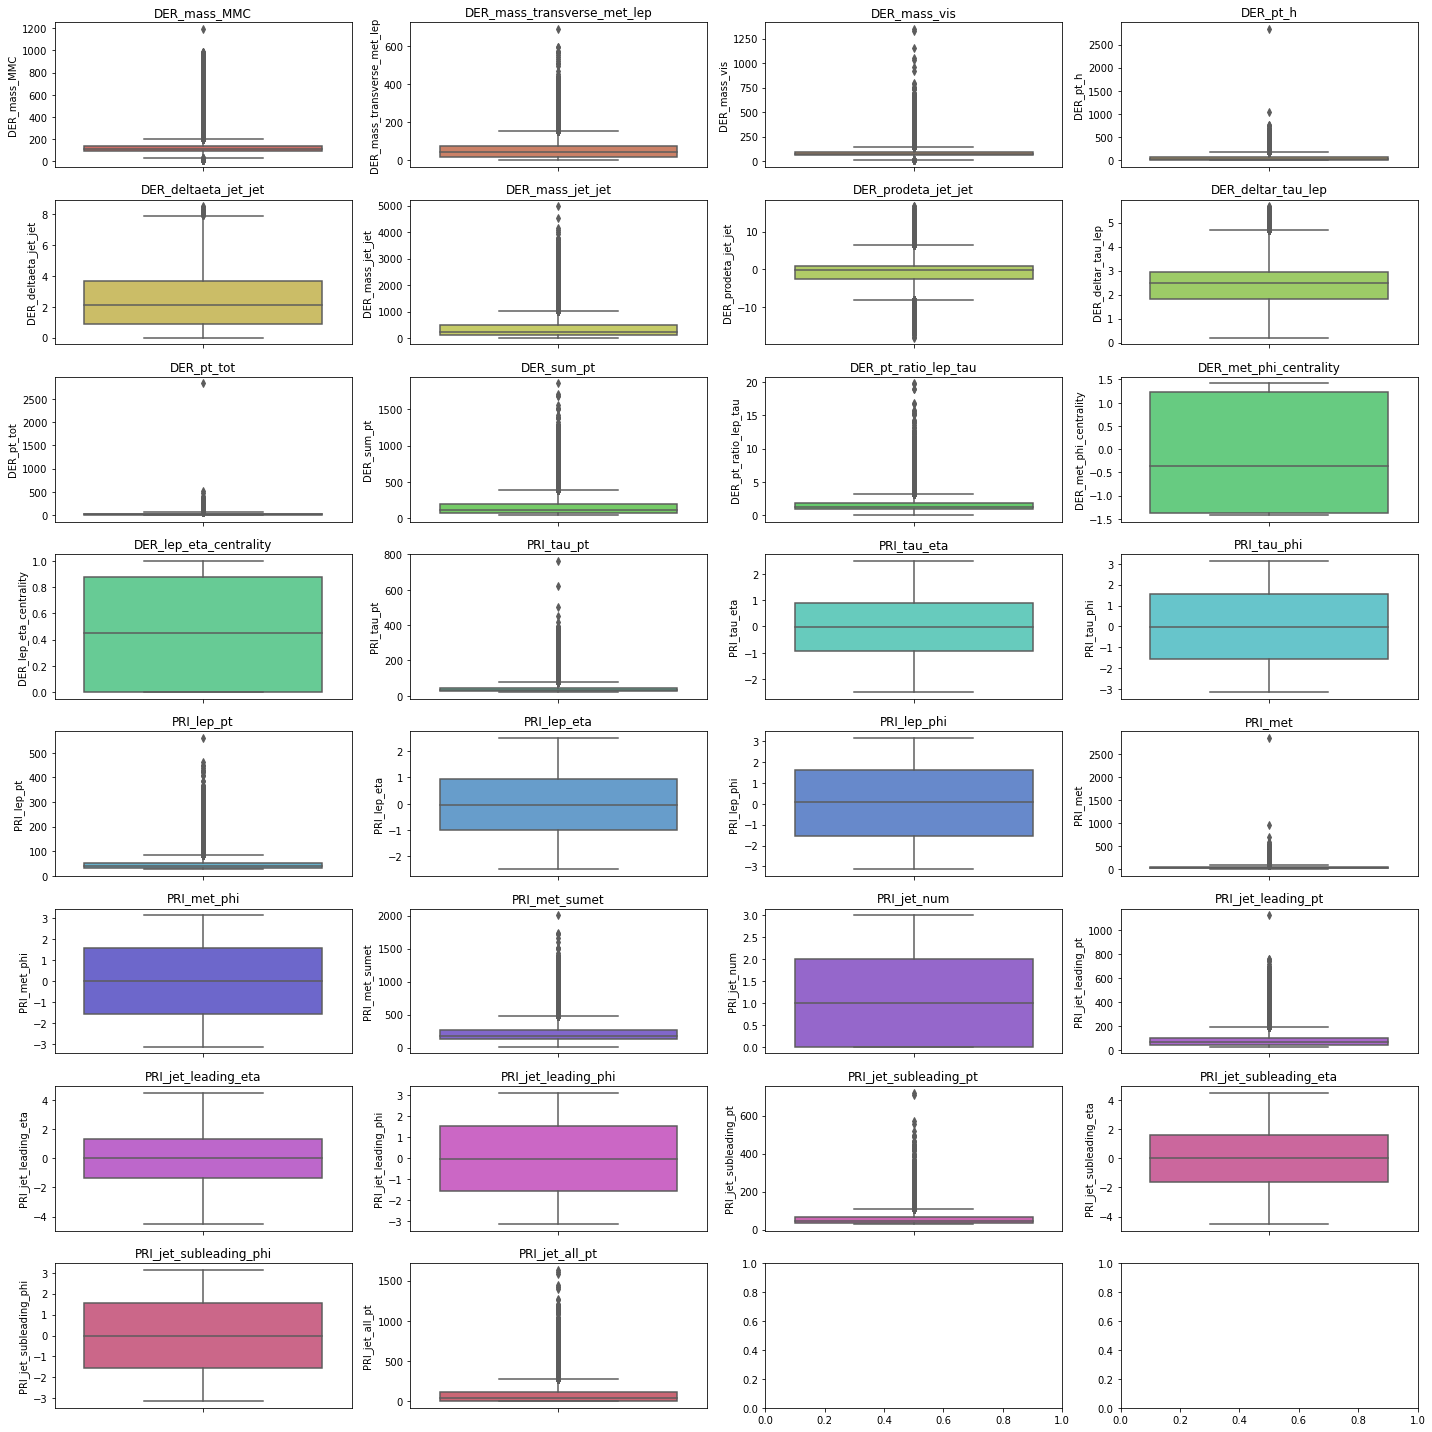

In [22]:

# Définition de la zone de tracage des graphiques
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

# Boucle pour tracer les graphiques
for i, col_name in enumerate(col_names):
    ax = axs[i//ncols, i%ncols]
    sns.boxplot( y=col_name, data=df, ax=ax, color=sns.color_palette("hls", 30)[i])
    ax.set_title(col_name)
    ax.set_ylabel(col_name)

plt.tight_layout() # evite les superpositions de légendes
plt.show()

La présence de quelques valeurs extrêmes exerce une forte influence sur les estimés produits par les méthodes de prédiction et peu rendre difficile la détection des effets représentés par la plus grande partie des données.
Certains algorithmes de Machine Learning sont sensibles à la distributions des données d’entrainement. Avoir des Outliers dans le Training Set d’un algorithme de Machine Learning peut rendre la phase d’entrainement plus longue, et biaiser l apprentissage. Par conséquent, le modèle prédictif produit ne sera pas performant, ou du moins, pas optimal.
Bien avant la phase d’apprentissage, les valeurs aberrantes influencent certains paramètres statistiques, comme la moyenne. Cela peut fausser notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier. Détecter ses Outliers et les traiter npermet de faire des suppositions plus fiables

Nous appliquerons dans la partie 2 dédiée au traitement des données **la methode du Zscore** pour identifier les outliers. Cette méthode est basée sur les propriétés statistiques de la population, ce qui permet de détecter les outliers indépendamment des distributions de données.

## Analyse Bi-Variée

-   **Variable PRI_jet_num et variables liées**  

Comme nous l avons vu lors de la recherche des données manquantes un certain nombre de variables sont lié à **PRI_jet_num**. Pour rappel il s agit de :  
-  **DER_deltaeta_jet_jet**, **DER_mass_jet_jet**, **DER_prodeta_jet_jet**,**DER_lep_eta_centrality**,**PRI_jet_subleading_pt**, **PRI_jet_subleading_eta** et **PRI_jet_subleading_phi** sont non definies si **PRI_jet_num ≤ 1**  

-  celles de **PRI_jet_leading_eta**, **PRI_jet_leading_phi** sont non definies si **PRI_jet_num ≤ 0**  


0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64


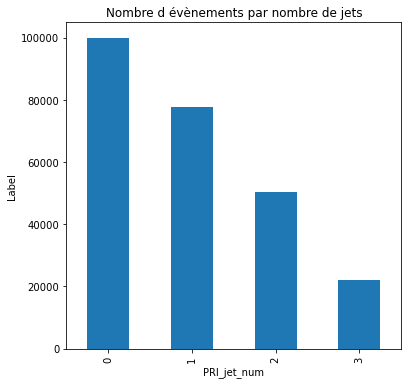

In [23]:
# Nombre d'évènement en fonction du nombre de jets
nbre_jet=df.PRI_jet_num.value_counts()
print(df.PRI_jet_num.value_counts())

# Representation graphique 
plt.figure(figsize=(6, 6))
nbre_jet.plot(kind='bar', stacked=True)
plt.xlabel('PRI_jet_num')
plt.ylabel('Label')
plt.title("Nombre d évènements par nombre de jets")
plt.show()

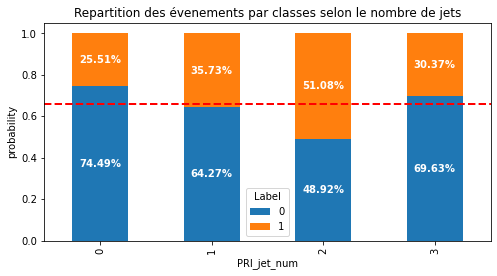

In [24]:
# Graphique PRI_jet_num croisé avec la variable cible (cross table)
ct = pd.crosstab(df.PRI_jet_num, df.Label)
ct = ct.div(ct.sum(1).astype(float), axis=0)

fig, ax = plt.subplots(figsize=(8,4))
ct.plot(kind="bar", stacked=True, ax=ax).axhline(y=0.657,linewidth=2,linestyle='--', color='r')

for i, bar in enumerate(ax.patches):
    x, y = bar.get_xy()
    h = bar.get_height()
    ax.text(x+bar.get_width()/2, y+h/2, str(round(h*100, 2))+'%', ha='center', va='center', color='white', fontweight='bold')

plt.title("Repartition des évenements par classes selon le nombre de jets")
plt.ylabel("probability")
plt.show()

La variable PRI_jet_num est interessantes pour l'entrainement de notre modèle, en effet on constate de grands ecarts de repartition des labels entre ces differentes modalités. On peut noter par exemple que seul 25% des evenements appartenant a la modalité "0"  sont du signal contre 51% de ceux ayant la modalité "2"

In [25]:
#Selection des variables possédant des données manquantes 
cols_nan=["PRI_jet_subleading_pt","DER_lep_eta_centrality","DER_deltaeta_jet_jet","DER_mass_jet_jet",
      "DER_prodeta_jet_jet","PRI_jet_subleading_phi","PRI_jet_subleading_eta","PRI_jet_leading_phi",
      "PRI_jet_leading_pt","PRI_jet_leading_eta","DER_mass_MMC"]

nan_variables=df.copy()
nan_variables= nan_variables[cols_nan]

# Répartitions de nos variables en fonctions du nombre de jets
jet_0= nan_variables[df.PRI_jet_num==0]
jet_1= nan_variables[df.PRI_jet_num==1]
jet_2= nan_variables[df.PRI_jet_num==2]
jet_3= nan_variables[df.PRI_jet_num==3]

# Dataframe: Proportion de valeurs non definies en fonction du nombre de jets
nan_df= pd.DataFrame()
nan_df["jet_0"]= jet_0.isnull().sum()/jet_0.isnull().count()*100
nan_df["jet_1"]= jet_1.isnull().sum()/jet_1.isnull().count()*100
nan_df["jet_2"]= jet_2.isnull().sum()/jet_2.isnull().count()*100
nan_df["jet_3"]= jet_3.isnull().sum()/jet_3.isnull().count()*100
nan_df.style.set_caption(" Proportion de valeurs non definies en fonction du nombre de jets ").set_precision(2)

Hormis **DER_mass_MMC**, dont les valeurs manquantes sont réparties sur les 4 modalités de **PRI_jet_num**", les autres variables ont leur valeurs manquantes sur les modalités 0 et/ou 1. (cela etait annoncé dans le descriptif des données) 
Nous repartissons ces variables dans 2 listes:  
- cols71 contient les variables ayant 71% de valeurs manquantes
- cols40, contient les variables ayant 71% de valeurs manquantes

- **Variable avec 71% de données manquantes**

In [26]:
# Création d'une liste des colonnes contenant 71% de données manquantes:
cols71= ["PRI_jet_subleading_pt","DER_lep_eta_centrality","DER_deltaeta_jet_jet","DER_mass_jet_jet",
      "DER_prodeta_jet_jet","PRI_jet_subleading_phi","PRI_jet_subleading_eta"]

Representons graphiquement les districbutions de ces variables :

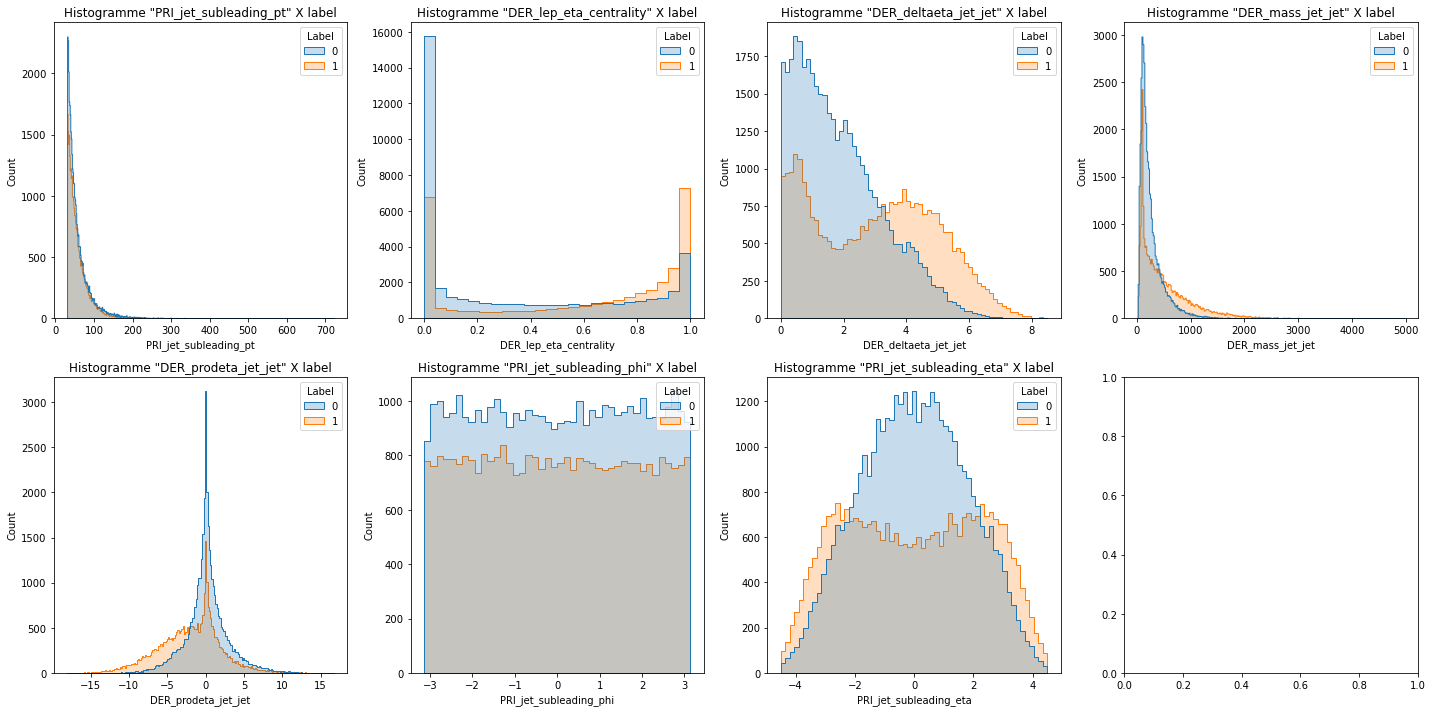

In [27]:
# Définition de la zone de tracage des graphiques
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Boucle pour tracer les graphiques
for i, col in enumerate(cols71):
    ax = axs[i//ncols, i%ncols]
    sns.histplot(data=df, x=col, hue='Label', element='step',ax=ax)
    ax.set_title(f'Histogramme "{col}" X label')


plt.tight_layout() # evite les superpositions de légendes
plt.show()

Les histogrammes de certaines des variable ayant 71% de données manquantes sont tres intéréssants car ils presentent des zones ou les deux labels sont differemment repartis. C'est par exemple le cas de **DER_deltaeta_jet_jet** ou la proportion des labels bruit/signal s inverse très netemment autour de la valeurs 3,5. on peux citer egalement les variables **DER_lep_eta_centrality**, **DER_mass_jet_jet**, **DER_prodeta_jet_jet** et **PRI_jet_subleading_eta**.  
A l'inverse la variable PRI_jet_subleading_phi ne presente que peu d interet même si le ratio  bruit/silence y semble plus élevé que dans le dataset complet (Pour rappel :1/3 signal, 2/3 bruit).
Le traitement de ces variables nous interroge beaucoup car elles sembles porter des inrormations interessantes pour l entrainement de notre modèle de classification toutefois 71% de leurs valeurs sont manquantes ! imputer des données lorsque 71% des valeurs d'une colonne sont manquantes peut causer des distorsions importantes des données et entraîner des résultats erronés lors de l'analyse. Il est sans doute préférable de supprimer la colonne ou de la conserver en discrétisant ces variables. Nous verrons cela lors de l'etape de transformation des données. En attendant placons ces variables dans une liste "cols2fill"

 - **Variable avec 40% et moins de données manquantes**

In [28]:
cols40= ["PRI_jet_leading_phi",
      "PRI_jet_leading_pt","PRI_jet_leading_eta","DER_mass_MMC"]

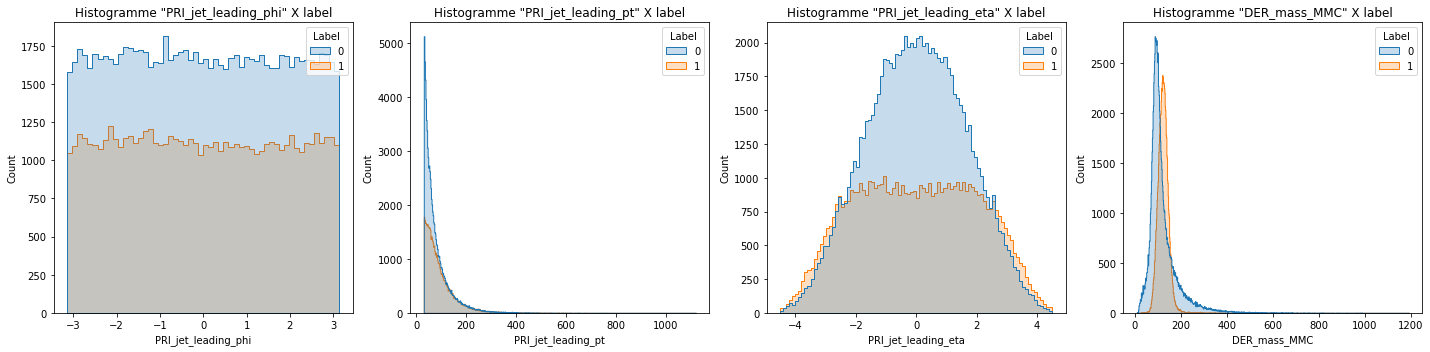

In [29]:
fig, axs = plt.subplots(1, len(cols40), figsize=(20,5))

for i, col in enumerate(cols40):
    sns.histplot(data=df, x=col, hue='Label', element='step',ax=axs[i])
    axs[i].set_title(f'Histogramme "{col}" X label')

plt.tight_layout()
plt.show()

Comme les variables citées precedemment, PRI_jet_leading_eta et PRI_jet_leading_pt  semblent présenter une répartition interessante pour la classification , nous les placons également dans notre liste "cols2fill". les autres variables sont placées dans la liste "cols2drop" et supprimées ulterieurement.
L histogramme de la variable DER_mass_MMC semble intéressant, avec un dedoublement des pics "bruit" et "signal" de plus elle presente un taux de valeurs manquantes un peu plus faibles que les autres avec 15,25%. Bien que cela represente deja beaucoup de données nous la traiterons à part. 

In [30]:
cols2fill= ["DER_deltaeta_jet_jet", "DER_mass_jet_jet","DER_lep_eta_centrality", "DER_prodeta_jet_jet", "PRI_jet_subleading_eta","PRI_jet_leading_pt","PRI_jet_leading_eta"]
cols2drop= ["PRI_jet_subleading_pt","PRI_jet_subleading_phi","PRI_jet_leading_phi"]

-   **Correlation entre les variables**

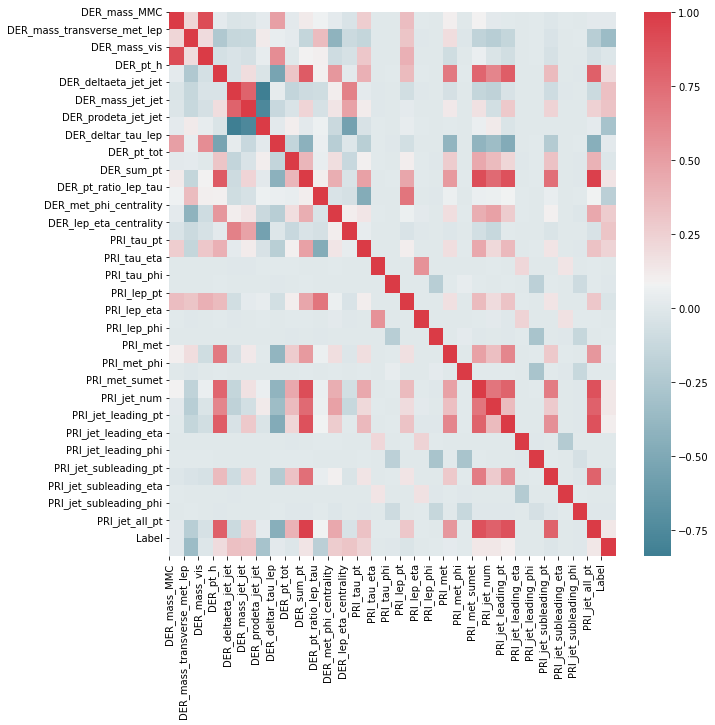

In [31]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(corr, cmap=colormap, annot=False,fmt=".3f") 
plt.xticks(range(len(corr.columns)), corr.columns); 
plt.yticks(range(len(corr.columns)), corr.columns) 
plt.show()

In [32]:
# On transforme corr en dataframe plus lisible  
corr_df = corr.unstack().reset_index() 
corr_df.columns= ['feature1', "feature2","correlation"]
corr_df= corr_df[corr_df['feature1'] != corr_df['feature2']]
corr_df.sort_values(by= "correlation", ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature1'] < corr_df['feature2']]

from IPython.display import display
# affichage des variables les plus corrélées positivement et négativement
display(corr_df.head(10))
display(corr_df.tail())

feature1            feature2  correlation
308      DER_sum_pt      PRI_jet_all_pt     0.965628
2      DER_mass_MMC        DER_mass_vis     0.911795
300      DER_sum_pt       PRI_met_sumet     0.904481
920  PRI_jet_all_pt       PRI_met_sumet     0.884413
302      DER_sum_pt  PRI_jet_leading_pt     0.879027
922  PRI_jet_all_pt  PRI_jet_leading_pt     0.878347
102        DER_pt_h          DER_sum_pt     0.832733
116        DER_pt_h  PRI_jet_leading_pt     0.826278
122        DER_pt_h      PRI_jet_all_pt     0.808616
921  PRI_jet_all_pt         PRI_jet_num     0.804326

feature1             feature2  correlation
240      DER_deltar_tau_lep   PRI_jet_leading_pt    -0.483625
220      DER_deltar_tau_lep             DER_pt_h    -0.539379
378  DER_lep_eta_centrality  DER_prodeta_jet_jet    -0.560273
161        DER_mass_jet_jet  DER_prodeta_jet_jet    -0.763316
130    DER_deltaeta_jet_jet  DER_prodeta_jet_jet    -0.835993

la heatmap et les 2 tableaux ci dessus montrent clairement les fortes correlations pouvant exister entre les variables notemment entre les variables DER_sum_pt et PRI_jet_all_pt (0,97) ou DER_mass_MMC et DER_mass_vis (0,92). En bas de tableau nous avons egalement une correlation négative entre DER_deltaeta_jet_jet et DER_prodeta_jet_jet qui est très élevée (-0,84).  
Observons graphiquement les corrélations les plus élevées.

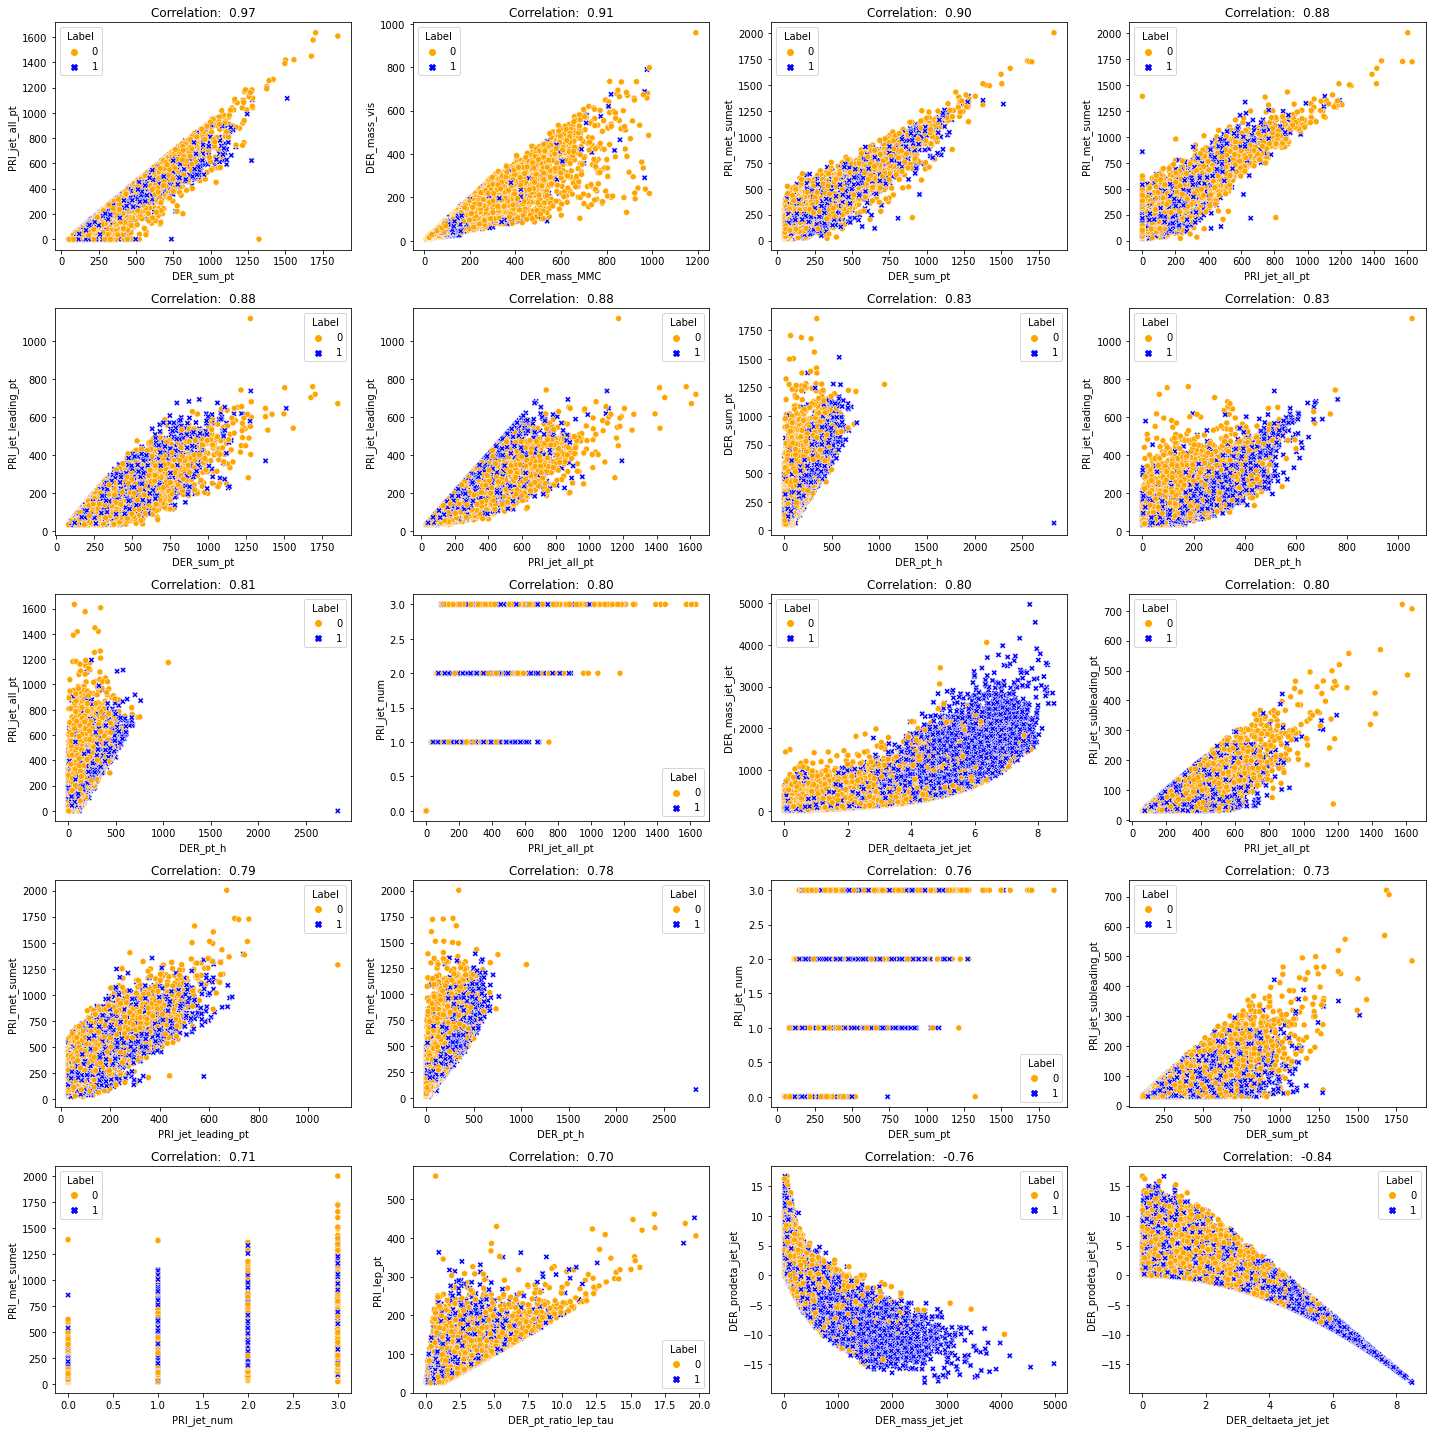

In [33]:
# Sélection des paires de features ayant une corrélation supérieure à 0.7
corr_df_forte = corr_df[corr_df['correlation'] > 0.7]
corr_df_forte = corr_df_forte.append(corr_df[corr_df['correlation'] < -0.7])

# Définition de la zone de tracage des graphiques
nrows = 5
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

# Boucle pour tracer les graphiques de corrélation
for i, (idx, row) in enumerate(corr_df_forte.iterrows()):
    ax = axs[i//ncols, i%ncols]
    sns.scatterplot(x=row['feature1'], y=row['feature2'], data=df, hue='Label', style='Label', ax=ax, 
                    palette=['orange','blue'])
    ax.set_title("Correlation:  {:.2f}".format(row['correlation']))
    ax.set_ylabel(row['feature2'])
    ax.set_xlabel(row['feature1'])
    ax.set_ylabel(row['feature2'])
    ax.set_xlabel(row['feature1'])

plt.tight_layout() # evite les superpositions de légendes
plt.show()

Nous pouvons voir que la variable DER_sum_pt est tres corrélées avec plusieurs autres variables. Lorsque deux variables sont fortement corrélées il est parfois conseillé d'en supprimer, cela evite la redondance d'information et permet de diminuer la complexité du modele et d'améliorer ses performances. Dans notre cas la suppression de DER_sum_pt n a apporté aucun changement à la performance de notre modèle,  nous choisissons donc de ne pas supprimer de variables à ce stade.

-    **comparaison des statistiques entre les deux classes**


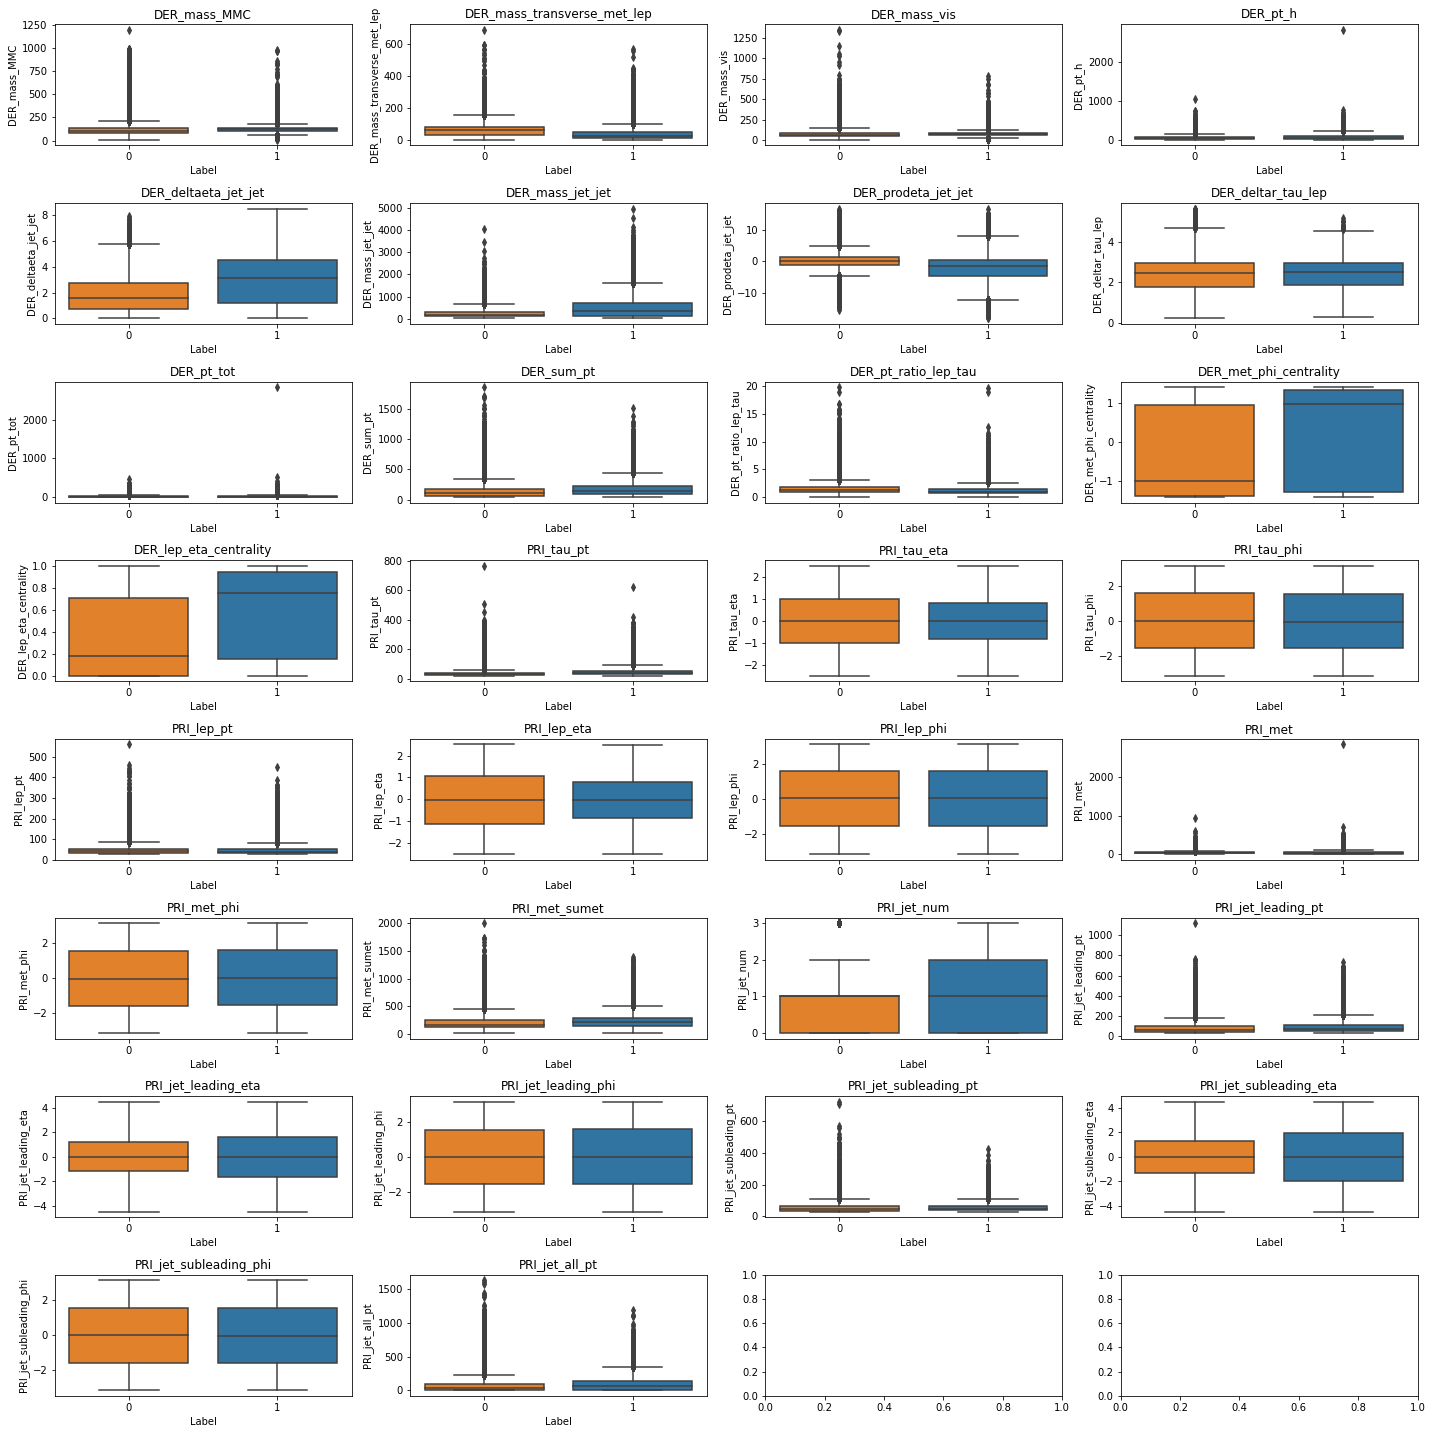

In [34]:
# Obtenir les noms des colonnes à  (on supprime la variable de classe Label)
col_names = df.columns[:-1]

# Définition de la zone de tracage des graphiques
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

colors = df.Label.map({0: "#1f77b4", 1: "#ff7f0e"})

# Boucle pour tracer les graphiques
for i, col_name in enumerate(col_names):
    ax = axs[i//ncols, i%ncols]
    sns.boxplot(x="Label", y=col_name, data=df, ax=ax,palette=colors)
    ax.set_title(col_name)
    ax.set_xlabel("Label")
    ax.set_ylabel(col_name)


plt.tight_layout() # evite les superpositions de légendes
plt.show()

Ce graphique permet de visualiser les différences de répartition entre les deux labels pour chaque variable. Cela peut aider à identifier les variables qui sont les plus discriminantes entre les deux labels. Il est possible de voir, par exemple, si la répartition des valeurs d'une variable est différente entre les deux labels. Cela peut aider à identifier les variables qui seront les plus utiles pour notre modèle de classification. Certains boxplots sont ecrasés par la presence de valeurs extrèmes, nous retracerons donc ce même graphique apres avoir traité les outliers (Partie 2).

-    **Correlation des variables avec la variable cible**


In [35]:
#Test variables les plus corrélé avec variable cible. Attention correlation lineaire

# Sélection des colonnes de données et de la variable cible
data_columns = df.drop(["Label"], axis=1)
target_column = df["Label"]

# Calcule  et tri  des corrélations entre les variables de données et la variable cible
correlation_matrix = data_columns.corrwith(target_column)
correlation_matrix = correlation_matrix.sort_values(ascending=False)

correlation_matrix

DER_deltaeta_jet_jet           0.328305
DER_mass_jet_jet               0.316727
DER_lep_eta_centrality         0.308082
DER_met_phi_centrality         0.271752
PRI_tau_pt                     0.235238
DER_pt_h                       0.192526
DER_sum_pt                     0.153236
PRI_met_sumet                  0.135520
PRI_jet_all_pt                 0.134296
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.109426
PRI_met                        0.022466
DER_deltar_tau_lep             0.012245
DER_mass_MMC                   0.011615
PRI_met_phi                    0.007475
PRI_lep_phi                    0.004125
PRI_lep_eta                    0.001516
PRI_jet_subleading_eta         0.001205
PRI_jet_leading_eta            0.000308
PRI_jet_leading_phi           -0.000221
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_jet_subleading_phi        -0.006294
DER_mass_vis                  -0.014055
DER_pt_tot                    -0.015287


Ce tableau qui présente les correlations entre les variables et la variable cible permet de déterminer quelles variables ont une forte influence sur le label. Cela peut aider à identifier les variables les plus importantes pour la prédiction de la variable cible de notre modèle. Les variables avec une corrélation élevée avec la variable cible sont généralement considérées comme des variables explicatives fortes. Attention toutefois, la corrélation calculée ici n est que lineaire, les autres type d interactions liant nos variables a label ne sont pas mesurées.
Il apparait tout de même que les variables DER_deltaeta_jet_jet, DER_mass_jet_jet et DER_lep_eta_centrality  sont sur le podium des variables les plus corrélées positivement avec le label. DER_mass_transverse_met_lep et DER_prodeta_jet_jet sont egalement en tête du classement avec une correlation négative.

# Partie 2:  Transformation des données 

## Dataset Train

-   **Gestion des Outliers**  
  
  Comme nous l avons indiqué lors de l observation des boxplots (partie 1 : analyse des données), nous allons supprimer les outliers grace a la methode de Zscore.

In [36]:
# Selection des variables necessitant un traitement des outliers selon les boxplos ci dessus
cols = ["DER_mass_MMC",
"DER_mass_transverse_met_lep",
"DER_mass_vis",
"DER_pt_h",
"DER_mass_jet_jet",
"DER_prodeta_jet_jet",
"DER_pt_tot",
"DER_sum_pt",
"DER_pt_ratio_lep_tau",
"PRI_tau_pt",
"PRI_lep_pt",
"PRI_met",
"PRI_met_sumet",
"PRI_jet_leading_pt",
"PRI_jet_subleading_pt",
"PRI_jet_all_pt",
]
# Création d un nouveau Dataframe contenant les variables dont l on souhaite traiter les outliers.
df_outliers = df.copy()
df_outliers.shape

(250000, 31)

In [37]:
# initialisation d'un dictionnaire pour stocker le nombre d'outliers pour chaque colonne
outliers_count = {}

# boucle sur les colonnes du dataframe
for col in cols:
    # calculer la moyenne et l'écart-type pour chaque variable
    mean = df_outliers[col].mean()
    std = df_outliers[col].std()
    # identifier les outliers en utilisant la méthode Z-score
    outliers = ((df_outliers[col] - mean) > 3 * std) | ((df_outliers[col] - mean) < -3 * std)
    # compter le nombre d'outliers pour chaque variable
    outliers_count[col] = outliers.sum()
    # supprimer les outliers
    df_outliers.drop(df_outliers[outliers].index, inplace=True)
    
# Dataframe avec le nombre d' outliers supprimé par variables 
outliers_count_df = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers_count'])
# Le pourcentage de valeurs supprimées au sein de chaque variable
outliers_count_df['Outliers_percentage'] = round(outliers_count_df['Outliers_count'] / df_outliers.shape[0] * 100,2)
outliers_count_df

Outliers_count  Outliers_percentage
DER_mass_MMC                           4043                 1.97
DER_mass_transverse_met_lep            1650                 0.80
DER_mass_vis                           4159                 2.02
DER_pt_h                               4665                 2.27
DER_mass_jet_jet                       1457                 0.71
DER_prodeta_jet_jet                     574                 0.28
DER_pt_tot                             3799                 1.85
DER_sum_pt                             3396                 1.65
DER_pt_ratio_lep_tau                   3343                 1.63
PRI_tau_pt                             4053                 1.97
PRI_lep_pt                             3194                 1.55
PRI_met                                3611                 1.76
PRI_met_sumet                          1807                 0.88
PRI_jet_leading_pt                     1635                 0.80
PRI_jet_subleading_pt                   735                 0.36
PRI_jet_all_pt                         2317                 1.13

In [38]:
df_outliers.shape

(205562, 31)

La suppression des outliers sur les variables selectionnées a causé la suppression de **44438** evenements(250000-205562)

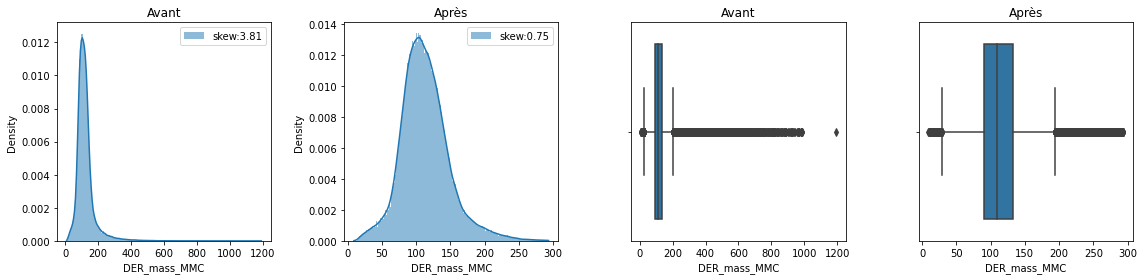

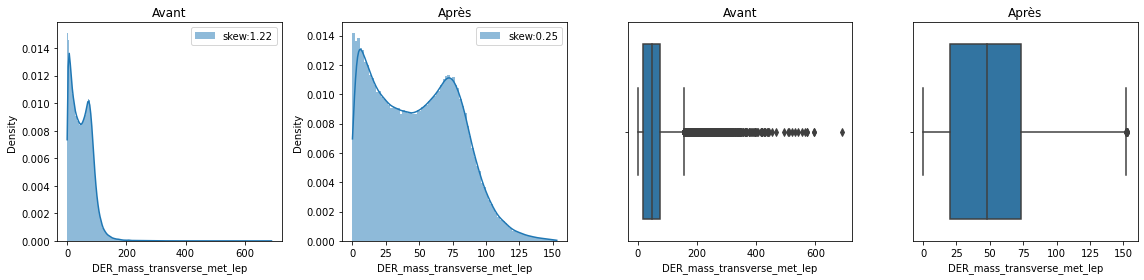

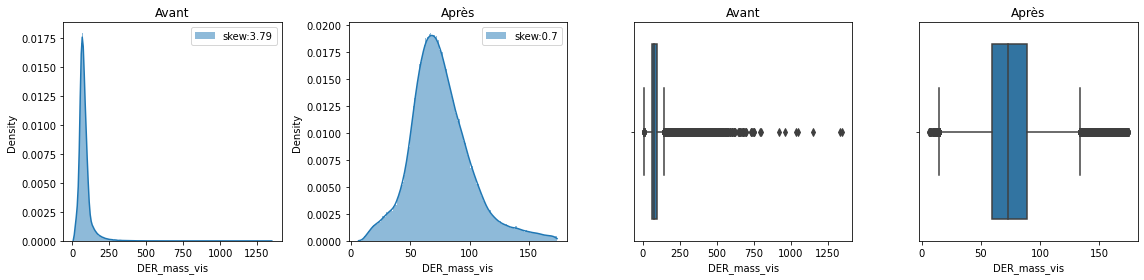

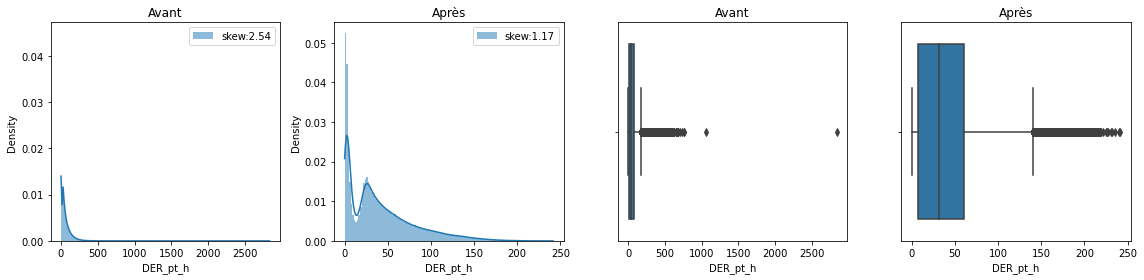

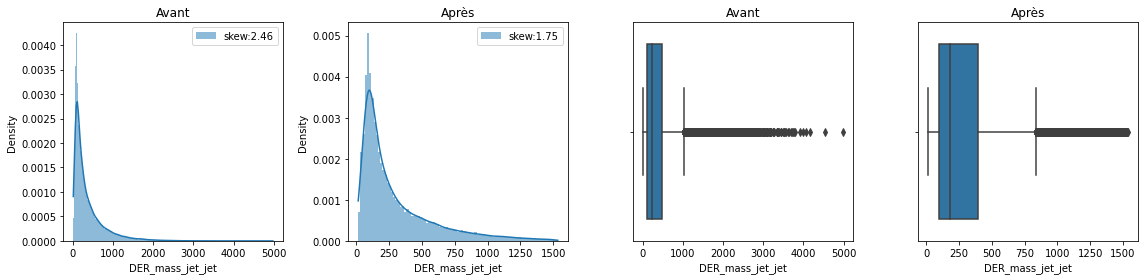

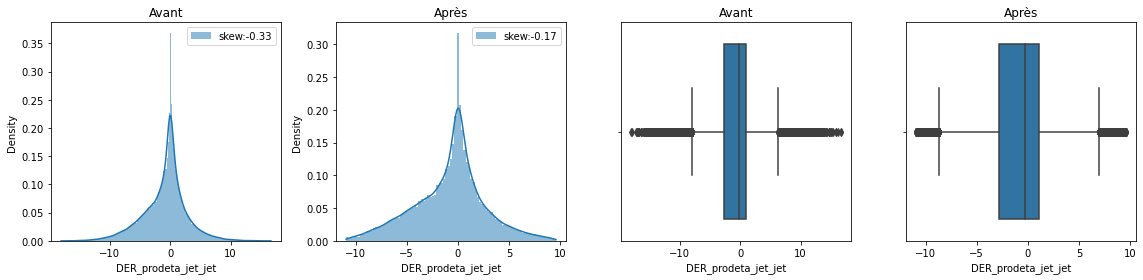

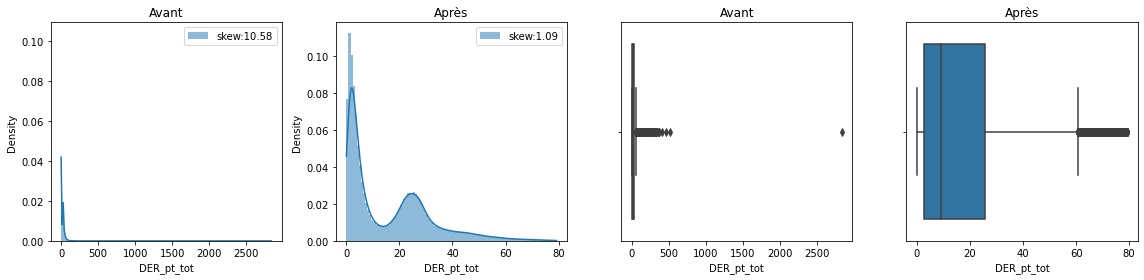

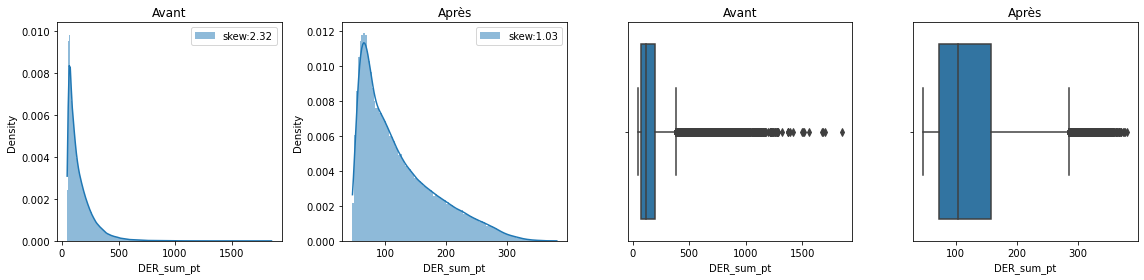

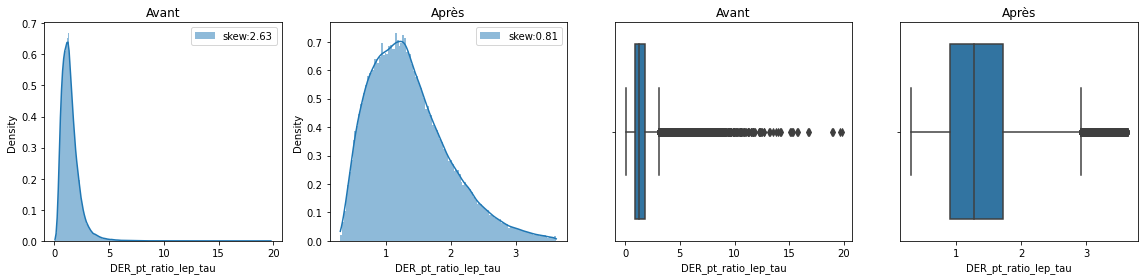

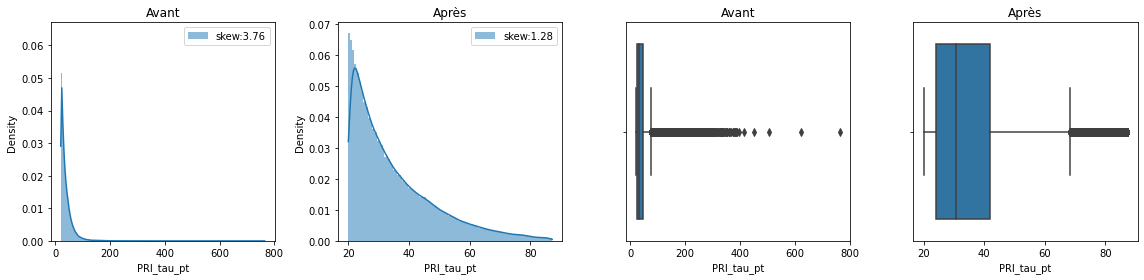

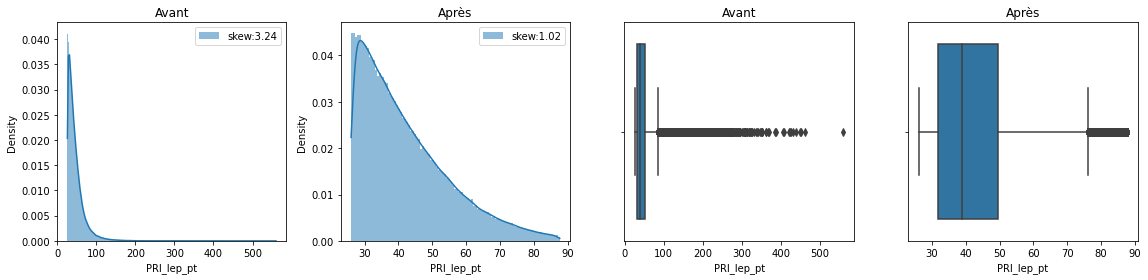

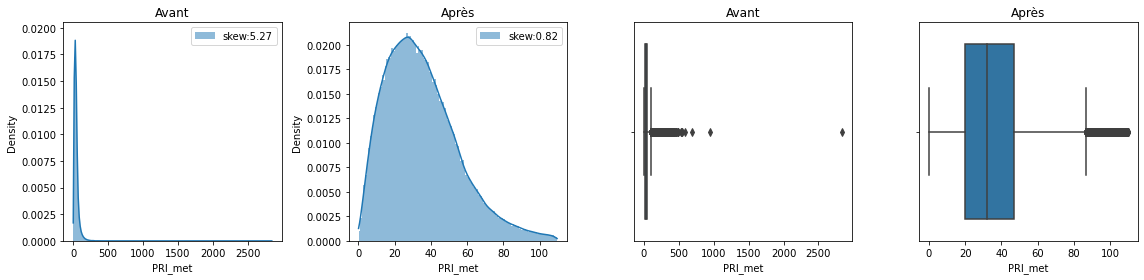

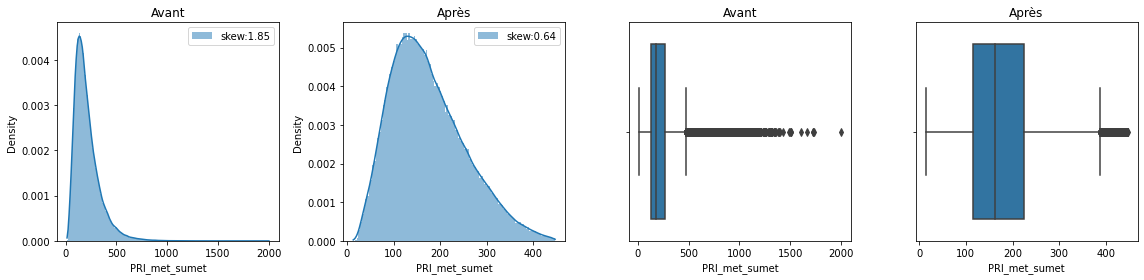

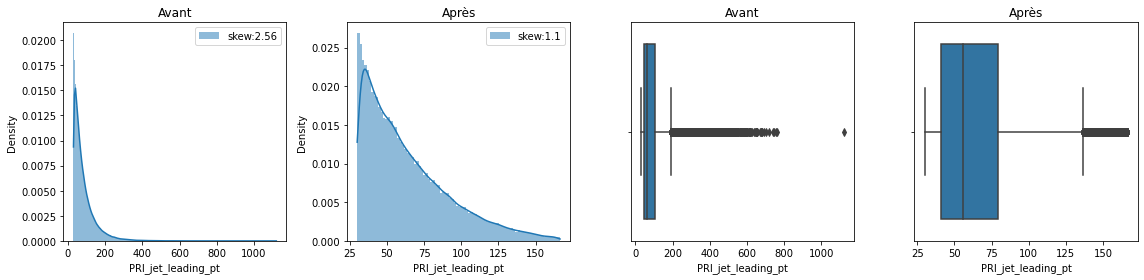

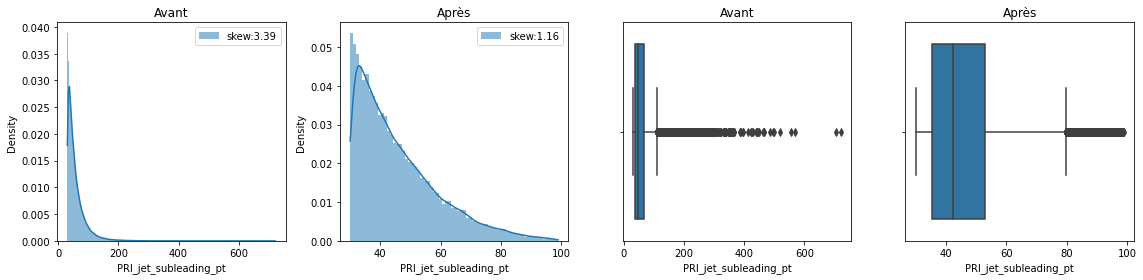

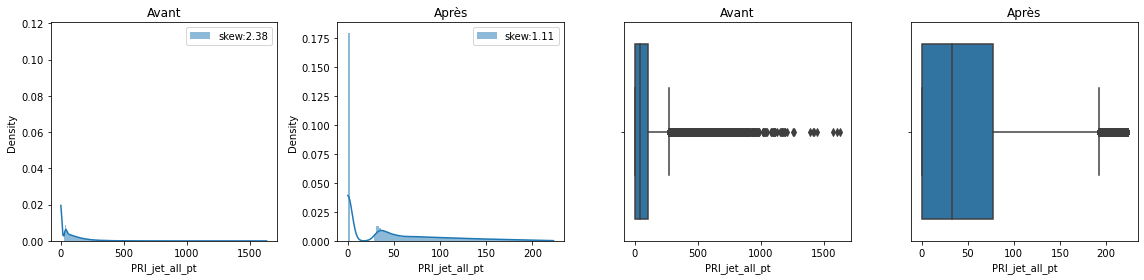

In [39]:
#Visualisation avant après suppressions des outliers à l'aide d'élements graphiques
for col in cols: 
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.histplot(df[col], label="skew:"+str(np.round(df[col].skew(),2)),kde=True, stat="density", linewidth=0)
    plt.title('Avant')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_outliers[col], label="skew:"+str(np.round(df_outliers[col].skew(),2)),kde=True, stat="density", linewidth=0)
    plt.title('Après')
    plt.legend()
        
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Avant')
    
    plt.subplot(144)
    sns.boxplot(df_outliers[col])
    plt.title('Après')
        
    plt.tight_layout() # evite les superpositions de légendes
    plt.show()

Les graphiques ci dessus nous permettent d'observer l'action de la suppression des outliers sur la distribution des données pour chaque variable. 
La lecture du skew, qui est une mesure de la symétrie d'une distribution de données, permet de constater que sa valeur diminue et se rapproche de 0. Cela est parfaitement logique puisque le skew permet de mesurer la différence entre la médiane et la moyenne de la distribution.les Outliers influencant fortement la moyenne mais pas la médiane,leur suppression  rapproche donc la moyenne de la mediane etce qui reduit l inclinaison de la distribution.

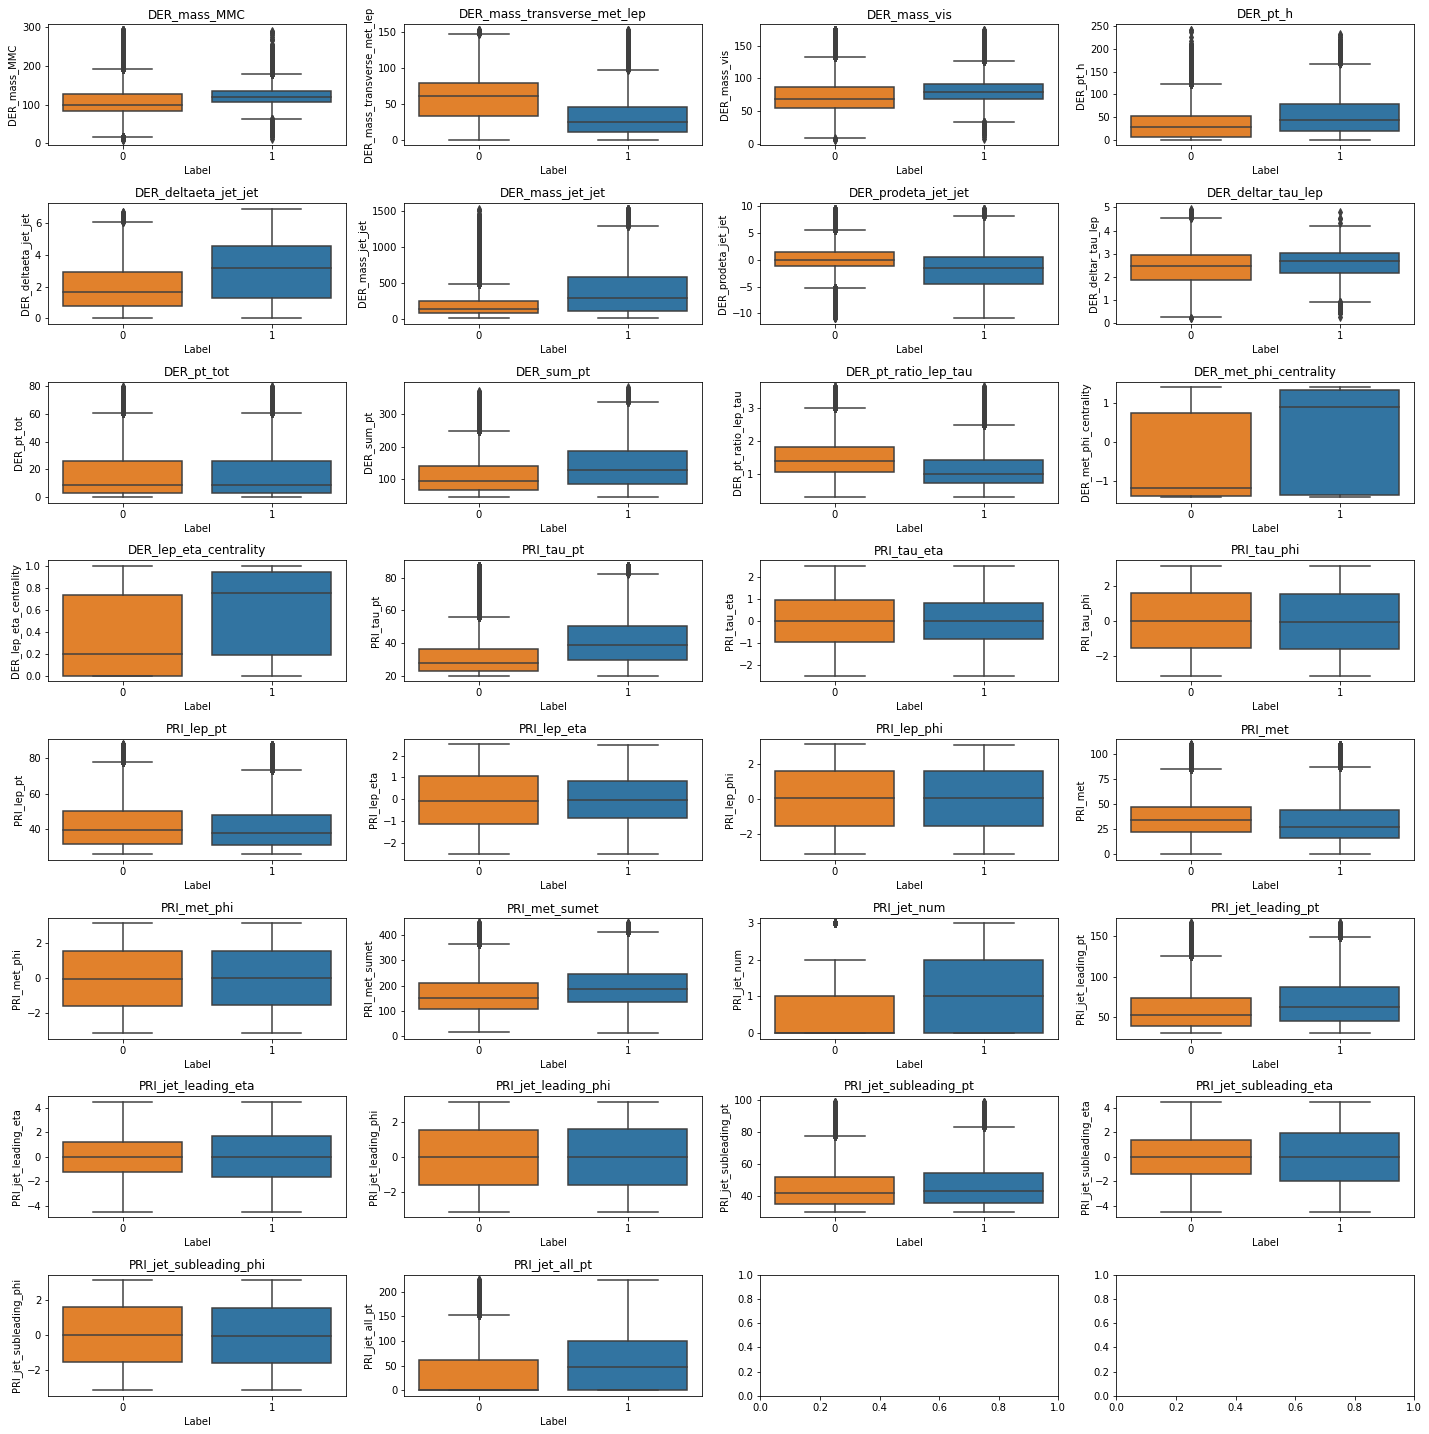

In [40]:
# Obtenir les noms des colonnes à  (on supprime la variable de classe Label)
col_names_out= df_outliers.columns[:-1]

# Définition de la zone de tracage des graphiques
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

colors = df_outliers.Label.map({0: "#1f77b4", 1: "#ff7f0e"})

# Boucle pour tracer les graphiques
for i, col in enumerate(col_names_out):
    ax = axs[i//ncols, i%ncols]
    sns.boxplot(x="Label", y=col, data=df_outliers, ax=ax,palette=colors)
    ax.set_title(col)
    ax.set_xlabel("Label")
    ax.set_ylabel(col)


plt.tight_layout() # evite les superpositions de légendes
plt.show()

Une fois les outliers traités, le graphique des boxplots permet de bien observer les differences de répartitions des valeurs entre les labels au sein d'une même variable. Ainsi il apparait que par exemple DER_mass_MMC, DER_mass_transverse_met_lep ou DER_deltaeta_jet_jet pourrais etre des variables discreminantes, interessantes pour notre modele.  
A l'inverse PRI_jet_subleading_phi, PRI_jet_leading_phi ou PRI_lep_phi semble peu interessantes car elles presentes la même repartitions de leurs valeurs entre les labels.

Nous pouvons constater que la suppression des outliers a fortement modifié notre jeux de données d'origine et nous nous interregeons sur le bien fondé d'une telle intervention. Sachant ces données extremement sensibles et ne disposant d'aucune directive du métier sur l'integration ou non des ces valeurs réeles mais atypiques dans notre modèle. Nous ferons le choix d'exploiter celles ci et de conserver ainsi notre jeu de données initial.

In [41]:
#On crée une copie de notre dataframe pour y realiser les modifications 
df_train=df.copy()


- **Traitement des colonnes avec données manquantes : "cols2fill"**

In [42]:
cols2fill= ["DER_deltaeta_jet_jet", "DER_mass_jet_jet","DER_lep_eta_centrality", "DER_prodeta_jet_jet", "PRI_jet_subleading_eta","PRI_jet_leading_pt","PRI_jet_leading_eta"]

Afin de ne pas perdre la totalité des variables ayant 40% et plus de données manquantes en les supprimant, nous choisissons de les discretiser. Prenons pour example DER_deltaeta_jet_jet :

<AxesSubplot:xlabel='DER_deltaeta_jet_jet', ylabel='Count'>

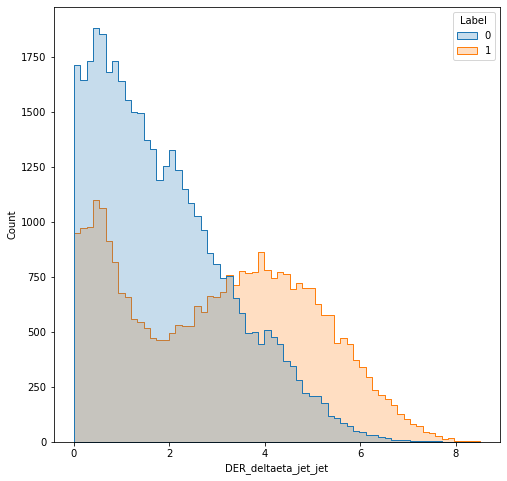

In [43]:
sns.histplot(data=df_train, x="DER_deltaeta_jet_jet", hue='Label', element='step')

Nous decidons de remplacer les valeurs effectives de cette variables par 4 modalités. Nous fixerons :
- pour les valeurs manquantes --> 0   
- pour les valeurs < 3,8 (plus de bruit que de signal) --> 1
- pour les valeur comprise entre 3,8 et 7 (majorité de signal)--> 2  
- pour les valeur >7 (essentielement Signal) --> 3  
  
Cela donne :

0    177463
1     55467
2     16702
3       368
Name: DER_deltaeta_jet_jet, dtype: int64


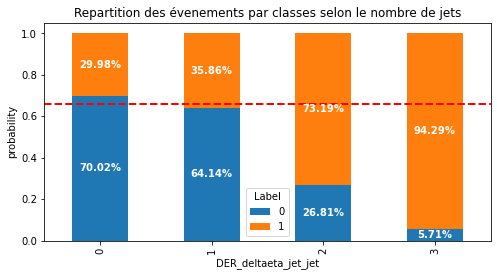

In [44]:
# discretisation  de DER_deltaeta_jet_jet
df_train['DER_deltaeta_jet_jet'] = df_train['DER_deltaeta_jet_jet'].fillna(0)
df_train['DER_deltaeta_jet_jet'] = df_train['DER_deltaeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 3.8 else (2 if x < 7 else 3)))
DER_deltaeta= df_train['DER_deltaeta_jet_jet'].value_counts()
print(df_train['DER_deltaeta_jet_jet'].value_counts())


# Graphique PRI_jet_num croisé avec la variable cible (cross table)
ct = pd.crosstab(df_train.DER_deltaeta_jet_jet, df_train.Label)
ct = ct.div(ct.sum(1).astype(float), axis=0)

fig, ax = plt.subplots(figsize=(8,4))
ct.plot(kind="bar", stacked=True, ax=ax).axhline(y=0.657,linewidth=2,linestyle='--', color='r')

for i, bar in enumerate(ax.patches):
    x, y = bar.get_xy()
    h = bar.get_height()
    ax.text(x+bar.get_width()/2, y+h/2, str(round(h*100, 2))+'%', ha='center', va='center', color='white', fontweight='bold')

plt.title("Repartition des évenements par classes selon le nombre de jets")
plt.ylabel("probability")
plt.show()

Cette méthode permet de conserver un peu de l'information apportée par DER_deltaeta_jet_jet tout en nous evitant d'imputer 71% des données avec les risques que cela comporte. 

Faisons la même chose avec les autres variables de "cols2fill"

In [45]:
# discretisation  de DER_mass_jet_jet
df_train['DER_mass_jet_jet'] = df_train['DER_mass_jet_jet'].fillna(0)
df_train['DER_mass_jet_jet'] = df_train['DER_mass_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 550 else (2 if x < 2500 else 3)))
DER_mass = df_train['DER_mass_jet_jet'].value_counts()

# discretisation  de DER_lep_eta_centrality
df_train['DER_lep_eta_centrality'] = df_train['DER_lep_eta_centrality'].fillna(0)
df_train['DER_lep_eta_centrality'] = df_train['DER_lep_eta_centrality'].apply(lambda x: 0 if x == 0 else (1 if x < 0.7 else (2 if x < 0.9 else 3)))
DER_lep= df_train['DER_lep_eta_centrality'].value_counts()

# discretisation  de DER_prodeta_jet_jet
df_train['DER_prodeta_jet_jet'] = df_train['DER_prodeta_jet_jet'].fillna(0)
df_train['DER_prodeta_jet_jet'] = df_train['DER_prodeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < -13 else (2 if x < -4 else 3)))
DER_prodetta= df_train['DER_prodeta_jet_jet'].value_counts()

# discretisation  de PRI_jet_subleading_eta
df_train['PRI_jet_subleading_eta'] = df_train['PRI_jet_subleading_eta'].fillna(0)
df_train['PRI_jet_subleading_eta'] = df_train['PRI_jet_subleading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.5 else (2 if x < 2.5 else 3)))
PRI_jet= df_train['PRI_jet_subleading_eta'].value_counts()

# discretisation  de PRI_jet_leading_pt
df_train['PRI_jet_leading_pt'] = df_train['PRI_jet_leading_pt'].fillna(0)
df_train['PRI_jet_leading_pt'] = df_train['PRI_jet_leading_pt'].apply(lambda x: 0 if x == 0 else (1 if x < 100 else 2))
PRI_jet_leading_p= df_train['PRI_jet_leading_pt'].value_counts()

# discretisation  de PRI_jet_leading_eta
df_train['PRI_jet_leading_eta'] = df_train['PRI_jet_leading_eta'].fillna(0)
df_train['PRI_jet_leading_eta'] = df_train['PRI_jet_leading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.6 else (2 if x < 2.6 else 3)))
PRI_jet_leading=df_train['PRI_jet_leading_eta'].value_counts()

# Creation d un dataframe pour visualiser le nombre d'evenements par classes pour chaque variable
df_trainalue_counts = pd.DataFrame({'DER_deltaeta_jet_jet': DER_deltaeta,
                         'DER_mass_jet_jet': DER_mass,
                         'DER_lep_eta_centrality': DER_lep,
                         'DER_prodeta_jet_jet': DER_prodetta,
                         'PRI_jet_subleading_eta': PRI_jet,
                         'PRI_jet_leading_pt': PRI_jet_leading_p,
                         'PRI_jet_leading_eta': PRI_jet_leading})

               
print("Nombre d'évènements par modalité:")      
df_trainalue_counts


Nombre d'évènements par modalité:


DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_lep_eta_centrality  \
0                177463            177457                  193209   
1                 55467             57328                   29084   
2                 16702             15029                   11030   
3                   368               186                   16677   

   DER_prodeta_jet_jet  PRI_jet_subleading_eta  PRI_jet_leading_pt  \
0               177515                  177466             99913.0   
1                  206                    9679            110202.0   
2                11890                   53421             39885.0   
3                60389                    9434                 NaN   

   PRI_jet_leading_eta  
0                99939  
1                11812  
2               126507  
3                11742

les pointillés rouge marquent la répartition moyenne de l ensemble du dataset


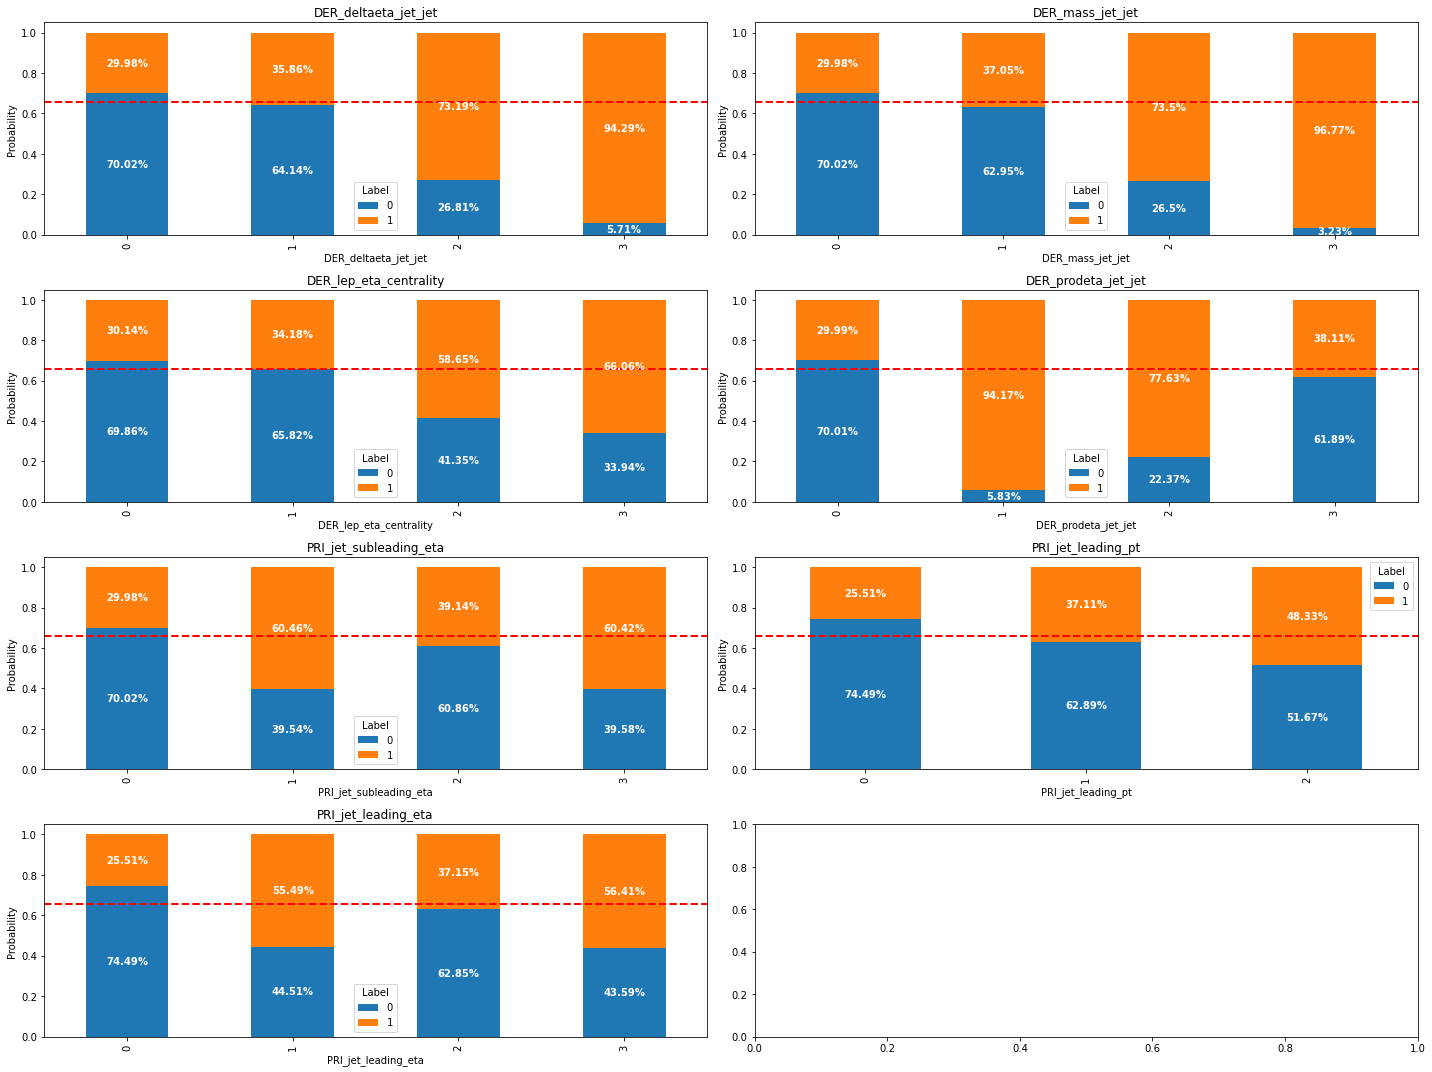

In [46]:
# Réalisation de graphiques permettant de voir la repartition des labels au sein de chaque classe
fig, axs = plt.subplots(4, 2, figsize=(20, 15))
axs = axs.ravel()

for i, col in enumerate(cols2fill):
    ct = pd.crosstab(df_train[col], df_train.Label)
    ct = ct.div(ct.sum(1).astype(float), axis=0)
    ct.plot(kind="bar", stacked=True, ax=axs[i]).axhline(y=0.657,linewidth=2,linestyle='--', color='r')
    axs[i].set_title(col)
    axs[i].set_ylabel("Probability")
    # affichage des valeurs au milieu de chaque label 
    for j, bar in enumerate(axs[i].patches):
        x, y = bar.get_xy()
        h = bar.get_height()
        axs[i].text(x+bar.get_width()/2, y+h/2, str(round(h*100, 2))+'%', ha='center', va='center', color='white', fontweight='bold')
    
plt.tight_layout() # evite les superpositions de légendes 

print("les pointillés rouge marquent la répartition moyenne de l ensemble du dataset")       
plt.show()


-   **Suppression des colonnes non désirées : "cols2drop"**  
  
Nous jugeons que ces variables n'ont que peu d interet.

In [47]:
cols2drop= ["PRI_jet_subleading_pt","PRI_jet_subleading_phi","PRI_jet_leading_phi"]

# Suppression des colonnes
df_train.drop(columns=cols2drop, inplace=True)
df_train.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2           NaN                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                     1                 1                    3   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_lep_phi  PRI_met  \
0               3.064      41.928     197.760  ...       -2.414   16.824   
1               3.473       2.078     125.157  ...        0.103   44.704   
2               3.148       9.336     197.814  ...        1.052   54.283   
3               3.310       0.414      75.968  ...       -3.100   31.082   
4               3.891      16.405      57.983  ...        1.569    2.723   

   PRI_met_phi  PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  \
0       -0.277        258.733            2                   1   
1       -1.916        164.546            1                   1   
2       -2.186        260.414            1                   1   
3        0.060         86.062            0                   0   
4       -0.871         53.131            0                   0   

   PRI_jet_leading_eta  PRI_jet_subleading_eta  PRI_jet_all_pt  Label  
0                    2                       2         113.497      1  
1                    2                       0          46.226      0  
2                    2                       0          44.251      0  
3                    0                       0          -0.000      0  
4                    0                       0           0.000      0  

[5 rows x 28 columns]

- **traitement des données manquantes de la variable DER_mass_MMC**

In [48]:
group_jet_df = df_train.groupby('PRI_jet_num').agg({'DER_mass_MMC': ['mean', 'median']})
group_jet_df ["NaN %"] = round(nan_df.iloc[10,:],2).tolist()

print("Nombre de valeurs manquantes pour la variable DER_mass_MMC:", df_train.DER_mass_MMC.isnull().sum())
group_jet_df

Nombre de valeurs manquantes pour la variable DER_mass_MMC: 38114


DER_mass_MMC            NaN %
                    mean    median       
PRI_jet_num                              
0             120.667654  111.4520  26.15
1             122.182109  112.4055   9.75
2             122.653136  115.2540   5.86
3             123.189990  107.5340   6.66

La majeurs parti des données manquantes de DER_mass_MMC se trouve dans la modalité 0 de PRI_jet_num avec 26% de NaN
Nous remplaçons les NaN par les valeurs medianes des évenements ayant la même modalité PRI_jet_num afin de modifier le moins possible la repartitions des données de DER_mass_MMC. Cette methode donne de meilleurs resultats sur notre modele que de supprimer les 38114 lignes comportant des NaN

In [49]:
# on groupe par  PRI_jet_num
group_jet= df_train.groupby("PRI_jet_num")

#O n rempli les Nan avec la mediane de chaque catégorie de jet 0,1,2, et 
df_train["DER_mass_MMC"] = group_jet["DER_mass_MMC"].apply(lambda x: x.fillna(x.median()))

#df_train=df_train.dropna(subset=['DER_mass_MMC'])

- **OneHotEncoding des  variables**  
   
Nous encondons la variable PRI_jet_nu ainsi que les les variables que nous avons précédement discretisées

In [50]:
from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder(sparse= False)

ohe.fit(df_train[['PRI_jet_num']])
PRI_jet_num_encoded= ohe.transform(df_train[['PRI_jet_num']])
df_train['PRI_jet_num_0'],df_train['PRI_jet_num_1'],df_train['PRI_jet_numt_2'],df_train['PRI_jet_num_3']= PRI_jet_num_encoded.T

ohe.fit(df_train[['DER_deltaeta_jet_jet']])
DER_deltaeta_encoded= ohe.transform(df_train[['DER_deltaeta_jet_jet']])
df_train['DER_deltaeta_0'],df_train['DER_deltaeta_1'],df_train['DER_deltaeta'],df_train['DER_deltaeta_3']= DER_deltaeta_encoded.T

ohe.fit(df_train[['DER_mass_jet_jet']])
DER_mass_encoded= ohe.transform(df_train[['DER_mass_jet_jet']])
df_train['DER_mass_0'],df_train['DER_mass_1'],df_train['DER_mass_2'],df_train['DER_mass_3']= DER_mass_encoded.T

ohe.fit(df_train[['DER_lep_eta_centrality']])
DER_lep_num_encoded= ohe.transform(df_train[['DER_lep_eta_centrality']])
df_train['DER_lep_0'],df_train['DER_lep_1'],df_train['DER_lep_2'],df_train['DER_lep_3']= DER_lep_num_encoded.T

ohe.fit(df_train[['DER_prodeta_jet_jet']])
DER_prodeta_encoded= ohe.transform(df_train[['DER_prodeta_jet_jet']])
df_train['DER_prodeta_0'],df_train['DER_prodeta_1'],df_train['DER_prodeta_2'],df_train['DER_prodeta_3']= DER_prodeta_encoded.T

ohe.fit(df_train[['PRI_jet_subleading_eta']])
PRI_jet_sub_encoded= ohe.transform(df_train[['PRI_jet_subleading_eta']])
df_train['PRI_jet_sub_0'],df_train['PRI_jet_sub_1'],df_train['PRI_jet_sub_2'],df_train['PRI_jet_sub_3']= PRI_jet_sub_encoded.T

ohe.fit(df_train[['PRI_jet_leading_pt']])
PRI_jet_leading_pt_encoded= ohe.transform(df_train[['PRI_jet_leading_pt']])
df_train['PRI_jet_leading_pt_0'],df_train['PRI_jet_leading_pt_1'],df_train['PRI_jet_leading_pt_2']= PRI_jet_leading_pt_encoded.T

ohe.fit(df_train[['PRI_jet_leading_eta']])
PRI_jet_leading_eta_encoded= ohe.transform(df_train[['PRI_jet_leading_eta']])
df_train['PRI_jet_leading_eta_0'],df_train['PRI_jet_leading_eta_1'],df_train['PRI_jet_leading_eta_2'],df_train['PRI_jet_leading_eta_3']= PRI_jet_leading_eta_encoded.T


df_train= df_train.drop(["PRI_jet_num",'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_lep_eta_centrality','DER_prodeta_jet_jet','PRI_jet_subleading_eta',"PRI_jet_leading_pt","PRI_jet_leading_eta"], axis=1)
df_train.head()


DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0      138.4700                       51.655        97.827    27.980   
1      160.9370                       68.768       103.235    48.146   
2      112.4055                      162.172       125.953    35.635   
3      143.9050                       81.417        80.943     0.414   
4      175.8640                       16.915       134.805    16.405   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
0               3.064      41.928     197.760                 1.582   
1               3.473       2.078     125.157                 0.879   
2               3.148       9.336     197.814                 3.776   
3               3.310       0.414      75.968                 2.354   
4               3.891      16.405      57.983                 1.056   

   DER_met_phi_centrality  PRI_tau_pt  ...  PRI_jet_sub_1  PRI_jet_sub_2  \
0                   1.396      32.638  ...            0.0            1.0   
1                   1.414      42.014  ...            0.0            0.0   
2                   1.414      32.154  ...            0.0            0.0   
3                  -1.285      22.647  ...            0.0            0.0   
4                  -1.385      28.209  ...            0.0            0.0   

   PRI_jet_sub_3  PRI_jet_leading_pt_0  PRI_jet_leading_pt_1  \
0            0.0                   0.0                   1.0   
1            0.0                   0.0                   1.0   
2            0.0                   0.0                   1.0   
3            0.0                   1.0                   0.0   
4            0.0                   1.0                   0.0   

   PRI_jet_leading_pt_2  PRI_jet_leading_eta_0  PRI_jet_leading_eta_1  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    1.0                    0.0   
4                   0.0                    1.0                    0.0   

   PRI_jet_leading_eta_2  PRI_jet_leading_eta_3  
0                    1.0                    0.0  
1                    1.0                    0.0  
2                    1.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0  

[5 rows x 51 columns]

In [51]:
#df_train.isnull().sum()

- **Selection des variables du model**

In [52]:
X_train= df_train.drop("Label", axis=1)
y_train= df_train["Label"] 
print(X_train.shape, y_train.shape)
#X_train.head()

(250000, 50) (250000,)


- **Balance des donnée: réequilibrage**

Il arrive souvent dans les cas de classification en Machine Learning que l’une des classes soit minoritaire par rapport à la population globale, c'est le cas dans notre base de données (ratio 66-34% entre Bruit et Signal). Cela peut être un problème car la plupart des algorithmes de classification se basent sur l’exactitude (ou l’accuracy) pour construire leurs modèles. Voyant que la grande majorité des observations appartient à la même catégorie, on risque de se retrouver avec un modèle peu intelligent qui va toujours prédire la classe dominante. Or justement, c’est la classe minoritaire qui nous intéresse.
Une technique pour corriger ce biais consiste tout simplement à rééquilibrer notre jeu de données. Soit en faisant de l’**undersampling**, en enlevant aléatoirement des données de la classe majoritaire, soit en faisant de l’**oversampling**, en rajoutant des nouvelles données dans la classe minoritaire (SMOTE). Notre base contenant un grand nombre de donées nous privilégerons la stratégie d'undersampling pour rééquilibrer notre jeu de données

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Sous-echantillonnage du jeu de données
rOs = RandomUnderSampler()
X_ro_train, y_ro_train = rOs.fit_resample(X_train, y_train)

# shape de x_resample et and y_resample
print("Shape of X:", X_ro_train.shape) 
print("Shape of y:", y_ro_train.shape)

y_ro_train.value_counts()


Shape of X: (171334, 50)
Shape of y: (171334,)


0    85667
1    85667
Name: Label, dtype: int64

On voit ainsi que le nombre d'evenements de notre dataset d'entrainement a diminué et que les nombres d'évenements labélisés "bruit" et "signal" sont egaux

- **Normalisation des données**

In [54]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler,MaxAbsScaler

sc = StandardScaler()
X_ro_train = sc.fit_transform(X_ro_train)


## Préparation des données de Test

Nous appliquons maintenant la totalité des transformations réalisées sur notre dastaset d'entrainement au dataset de test.

In [55]:
df_test= df_initial[df_initial.KaggleSet=="v"]
print(f"Le dataset de test comprend {df_test.shape[0]} lignes et {df_test.shape[1]} colonnes.")

Le dataset de test comprend 450000 lignes et 35 colonnes.


-   **Suppresion des colonnes inutiles**

In [56]:
df_test.drop(["Weight","KaggleSet","KaggleWeight","EventId"], axis=1,inplace=True)

-   **Remplacement des valeurs abérrantes par des NaN**

In [57]:
# on remplace donc -999 par NaN
df_test=df_test.replace(-999,np.nan)

- **Traitement des colonnes interessantes : "cols2fill"**


In [58]:
df_test['DER_deltaeta_jet_jet'] = df_test['DER_deltaeta_jet_jet'].fillna(0)
df_test['DER_deltaeta_jet_jet'] = df_test['DER_deltaeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 3.8 else (2 if x < 7 else 3)))
DER_deltaeta= df_test['DER_deltaeta_jet_jet'].value_counts()

df_test['DER_mass_jet_jet'] = df_test['DER_mass_jet_jet'].fillna(0)
df_test['DER_mass_jet_jet'] = df_test['DER_mass_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 550 else (2 if x < 2500 else 3)))
DER_mass = df_test['DER_mass_jet_jet'].value_counts()

df_test['DER_lep_eta_centrality'] = df_test['DER_lep_eta_centrality'].fillna(0)
df_test['DER_lep_eta_centrality'] = df_test['DER_lep_eta_centrality'].apply(lambda x: 0 if x == 0 else (1 if x < 0.7 else (2 if x < 0.9 else 3)))
DER_lep= df_test['DER_lep_eta_centrality'].value_counts()

df_test['DER_prodeta_jet_jet'] = df_test['DER_prodeta_jet_jet'].fillna(0)
df_test['DER_prodeta_jet_jet'] = df_test['DER_prodeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < -13 else (2 if x < -4 else 3)))
DER_prodetta= df_test['DER_prodeta_jet_jet'].value_counts()

df_test['PRI_jet_subleading_eta'] = df_test['PRI_jet_subleading_eta'].fillna(0)
df_test['PRI_jet_subleading_eta'] = df_test['PRI_jet_subleading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.5 else (2 if x < 2.5 else 3)))
PRI_jet= df_test['PRI_jet_subleading_eta'].value_counts()

df_test['PRI_jet_leading_pt'] = df_test['PRI_jet_leading_pt'].fillna(0)
df_test['PRI_jet_leading_pt'] = df_test['PRI_jet_leading_pt'].apply(lambda x: 0 if x == 0 else (1 if x < 100 else 2))
PRI_jet_leading_p= df_test['PRI_jet_leading_pt'].value_counts()

df_test['PRI_jet_leading_eta'] = df_test['PRI_jet_leading_eta'].fillna(0)
df_test['PRI_jet_leading_eta'] = df_test['PRI_jet_leading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.6 else (2 if x < 2.6 else 3)))
PRI_jet_leading=df_test['PRI_jet_leading_eta'].value_counts()

df_value_counts = pd.DataFrame({'DER_deltaeta_jet_jet': DER_deltaeta,
                         'DER_mass_jet_jet': DER_mass,
                         'DER_lep_eta_centrality': DER_lep,
                         'DER_prodeta_jet_jet': DER_prodetta,
                         'PRI_jet_subleading_eta': PRI_jet,
                         'PRI_jet_leading_pt': PRI_jet_leading_p,
                         'PRI_jet_leading_eta': PRI_jet_leading})

                     
df_value_counts

DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_lep_eta_centrality  \
0                318944            318918                  347234   
1                100220            103644                   52575   
2                 30158             27104                   20329   
3                   678               334                   29862   

   DER_prodeta_jet_jet  PRI_jet_subleading_eta  PRI_jet_leading_pt  \
0               319021                  318948            179993.0   
1                  364                   17405            198045.0   
2                21658                   96275             71962.0   
3               108957                   17372                 NaN   

   PRI_jet_leading_eta  
0               180046  
1                20883  
2               228424  
3                20647

- **Traitement des colonnes non désirées: "cols2drop**

In [59]:
df_test.drop(columns=cols2drop, inplace=True)

- **Transformation des label en binaire (0-1)**

In [60]:
# creation d'une fonction pour transformer le label en variable numérique
def label2numeric(x):
    """
    Fonction permetantt de transformer le label en variable numerique.
        - 0 pour le label bruit (b)
        - 1 pour le signal (s)
    """
    if x=="b":
        return(0)
    else:
        return(1)
    
    
# transformation de la variable de classe en variables numérique
df_test.Label= df_test.Label.apply(label2numeric)
df_test.Label.value_counts()

0    296317
1    153683
Name: Label, dtype: int64

- **Traitement des données manquantes de la variable DER_mass_MMC**

In [61]:
print("Nombre de valeurs manquantes pour la variable DER_mass_MMC dans le dataset de test:", df_test.DER_mass_MMC.isnull().sum())

Nombre de valeurs manquantes pour la variable DER_mass_MMC dans le dataset de test: 68747


In [62]:
# on groupe par  PRI_jet_num
group_jet= df_test.groupby("PRI_jet_num")

#On rempli les Nan avec la moyenne de chaque ctégorie de jet 0,1,2, et 
df_test["DER_mass_MMC"] = group_jet["DER_mass_MMC"].apply(lambda x: x.fillna(x.median()))
#df_test=df_test.dropna(subset=['DER_mass_MMC'])

- **OneHotEncoding des variables**

In [64]:
ohe= OneHotEncoder(sparse= False)

ohe.fit(df_test[['PRI_jet_num']])
PRI_jet_num_encoded= ohe.transform(df_test[['PRI_jet_num']])
df_test['PRI_jet_num_0'],df_test['PRI_jet_num_1'],df_test['PRI_jet_numt_2'],df_test['PRI_jet_num_3']= PRI_jet_num_encoded.T

ohe.fit(df_test[['DER_deltaeta_jet_jet']])
DER_deltaeta_encoded= ohe.transform(df_test[['DER_deltaeta_jet_jet']])
df_test['DER_deltaeta_0'],df_test['DER_deltaeta_1'],df_test['DER_deltaeta'],df_test['DER_deltaeta_3']= DER_deltaeta_encoded.T

ohe.fit(df_test[['DER_mass_jet_jet']])
DER_mass_encoded= ohe.transform(df_test[['DER_mass_jet_jet']])
df_test['DER_mass_0'],df_test['DER_mass_1'],df_test['DER_mass_2'],df_test['DER_mass_3']= DER_mass_encoded.T

ohe.fit(df_test[['DER_lep_eta_centrality']])
DER_lep_num_encoded= ohe.transform(df_test[['DER_lep_eta_centrality']])
df_test['DER_lep_0'],df_test['DER_lep_1'],df_test['DER_lep_2'],df_test['DER_lep_3']= DER_lep_num_encoded.T

ohe.fit(df_test[['DER_prodeta_jet_jet']])
DER_prodeta_encoded= ohe.transform(df_test[['DER_prodeta_jet_jet']])
df_test['DER_prodeta_0'],df_test['DER_prodeta_1'],df_test['DER_prodeta_2'],df_test['DER_prodeta_3']= DER_prodeta_encoded.T

ohe.fit(df_test[['PRI_jet_subleading_eta']])
PRI_jet_sub_encoded= ohe.transform(df_test[['PRI_jet_subleading_eta']])
df_test['PRI_jet_sub_0'],df_test['PRI_jet_sub_1'],df_test['PRI_jet_sub_2'],df_test['PRI_jet_sub_3']= PRI_jet_sub_encoded.T

ohe.fit(df_test[['PRI_jet_leading_pt']])
PRI_jet_leading_pt_encoded= ohe.transform(df_test[['PRI_jet_leading_pt']])
df_test['PRI_jet_leading_pt_0'],df_test['PRI_jet_leading_pt_1'],df_test['PRI_jet_leading_pt_2']= PRI_jet_leading_pt_encoded.T

ohe.fit(df_test[['PRI_jet_leading_eta']])
PRI_jet_leading_eta_encoded= ohe.transform(df_test[['PRI_jet_leading_eta']])
df_test['PRI_jet_leading_eta_0'],df_test['PRI_jet_leading_eta_1'],df_test['PRI_jet_leading_eta_2'],df_test['PRI_jet_leading_eta_3']= PRI_jet_leading_eta_encoded.T


df_test= df_test.drop(["PRI_jet_num",'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_lep_eta_centrality','DER_prodeta_jet_jet','PRI_jet_subleading_eta',"PRI_jet_leading_pt","PRI_jet_leading_eta"], axis=1)

- **Selection des variables du model**


In [66]:
X_test= df_test.drop("Label", axis=1)
y_test= df_test["Label"] 
X_test.shape

(450000, 50)

- **Normalisation des données de test**


In [67]:
X_test = sc.transform(X_test)

# Partie 3: Entrainement, optimisation (Gridsearch) et évaluation des modèles

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import scikitplot as skplt

## Regression Logistique

In [69]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()

# définition des paramètres à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l1', 'l2']}
gs = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# entraînement du modèle en utilisant les données d'entraînement
gs.fit(X_ro_train, y_ro_train)

# meilleurs paramètres
print("Meilleurs paramètres: ", gs.best_params_)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :", gs.best_score_)

Meilleurs paramètres:  {'C': 1, 'penalty': 'l2'}
Sur ce jeu de données, le taux de succès en classification moyen de : 0.7464134575652417


              precision    recall  f1-score   support

           0       0.86      0.73      0.79    296317
           1       0.59      0.77      0.67    153683

    accuracy                           0.74    450000
   macro avg       0.72      0.75      0.73    450000
weighted avg       0.77      0.74      0.75    450000

[[215338  80979]
 [ 36010 117673]]
accuracy is 0.7400244444444445


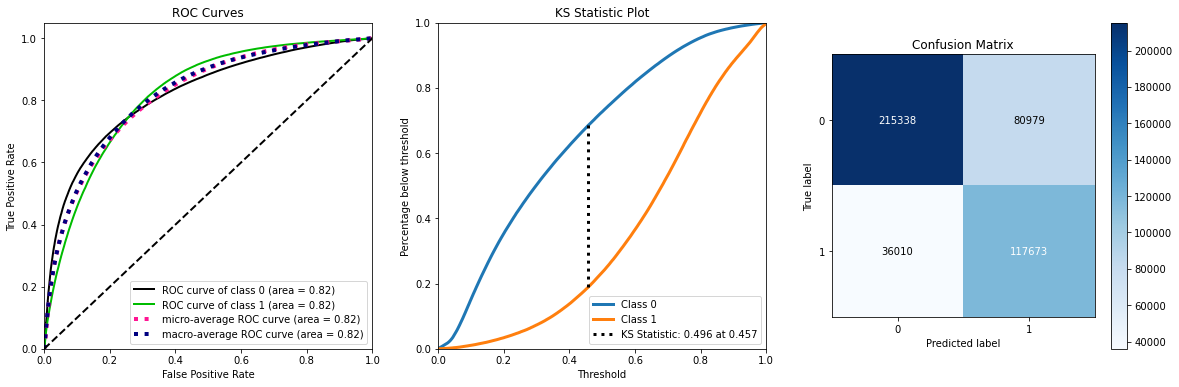

In [70]:
Model_log= gs.best_estimator_
Model_log.fit(X_ro_train, y_ro_train)

y_probas = Model_log.predict_proba(X_test)
y_pred = Model_log.predict(X_test)

# Résumé des prédictions
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

# Graphiques
fig, ax = plt.subplots(1, 3, figsize=(20,6))
skplt.metrics.plot_roc(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[1])

plt.show()


Pour juger la performance de notre modèle nous avons:  
- L'accuracy mesure le pourcentage de prédictions correctes sur l'ensemble des prédictions effectuées par le modèle. Accuracy = (nombre de prédictions correctes) / (nombre total de prédictions). Notre modèle prédit correctement 74% des labels . Ce score est toutefois à relativiser puisque la repartion du label est d'environ 66 / 34 %, ce qui signifie que si notre modèle predisait toujours le label bruit nous aurions un score une accuracy de 66%.

- La matrice de confusion: Sur la  diagonale partant du coin supérieur gauche de la table (215338/117673) se trouve les individus correctement classés. (L'autre diagonal partant du coin superieur droit correspond aux individus mal classés). On comprend ainsi que le taux d'accuracy est obtenu de la manière suivante: vrai positif et vrai négatif sur le total de notre population. Soit (215338+117673)/450000. Cela semble un bon score, néanmoins cette métrique n'indique pas les forces et faiblesses de notre modèle.  

- Le recall mesure la proportion de cas positifs réels qui ont été correctement identifiés par le modèle. Sur tous les enregistrements positifs combien d'enregistrements sont prédits correctement: vrai positif / (vrai positif + faux négatif) soit 77 %. Le recall est une métrique de sensibilité et pour notre cas nous cherchons justement à nous rapprocher de 1.  

- La précision mesure la proportion de cas positifs prédits par le modèle qui sont réellement positifs. Sur tous les positifs prédits, combien sont réellement positifs. Cette métrique est intéressante lorsque l'on souhaite minimiser les faux positifs. Precision = vrai positif / (vrai positif + faux positif)  

- Le F1 Score combine la précision et le rappel. Il est particulièrement utile lorsque les classes sont déséquilibrées. Par exemple si nous avions une  grande majorité de vrais négatifs, ces derniers fausseraient notre perception de la performance de l'algorithme. Dans notre cas, nous enregistrons un résultat de 73% en moyenne.
  
- La courbe ROC est le graphique représentant les performances d'un modèle de classification pour les seuils de classification. La courbe optimale est celle la plus proche du coin supérieur gauche. Notre courbe nous montre que notre prédiction est bien meilleure qu'une prédiction aléatoire, en effet, nous pouvons observer que notre courbe s'éloigne de la diagonale bissectrice et se rapproche de l'angle supérieur gauche ou sensibilité et spécificité se rapprochent de 100%.  
Un modèle parfait suggère un éloignement complet de la ROC de la bissectrice. Plus la courbe s’éloigne,plus l’aire sous la courbe est importante et plus le modèle est performant. Ici, on a une AUC=0.82, ce qui donne un Gini =2AUC-1= 2*0.82-1= 0.66. Le coefficient de Gini mesurant la différence entre la distribution de la classe cible réelle et celle prédite par le modèle, un score de 0,66 peut signifier que le modèle a des difficultés à prédire certaines classes, ou qu'il a un biais en faveur d'une classe particulière.  
  
- Le graphique de Test de Kolmogorov-Smirnov permet d'observer permet d observer la distance entre nos 2 modalités, plus l ecart est grand plus la classification est optimale.


## RandomForest Classifier

              precision    recall  f1-score   support

           0       0.90      0.82      0.86    296317
           1       0.71      0.83      0.76    153683

    accuracy                           0.82    450000
   macro avg       0.80      0.82      0.81    450000
weighted avg       0.84      0.82      0.83    450000

[[244144  52173]
 [ 26892 126791]]
accuracy is 0.8243
Sur ce jeu de données, le taux de succès en classification moyen de : 0.821728320123268


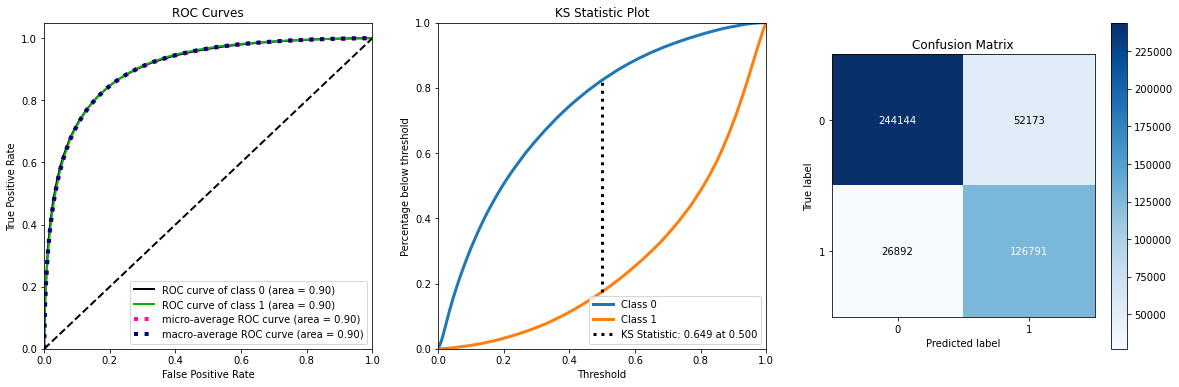

In [71]:
from sklearn.ensemble import RandomForestClassifier 

Model_ran=RandomForestClassifier(n_estimators=200)

Model_ran = Model_ran.fit(X_ro_train, y_ro_train)
y_probas = Model_ran.predict_proba(X_test)
y_pred = Model_ran.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))
score = cross_val_score(Model_ran, X_ro_train, y_ro_train,cv=2)

print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())

# figures
fig, ax = plt.subplots(1, 3, figsize=(20,6))
skplt.metrics.plot_roc(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[1])

plt.show()

Les resultats obtenus avec le modèle randomForest est plus performant sur l ensemble des critères decrits précédemment. L'aire sous la courbe ROC est de 0,9, ce qui fait un score de Gini de 0,8  
En effet, nous enregistrons les résultats suivant :
- On note  que la sensibilité (recall) est de 0.83 pour la classe 1 (Signal), cela signifie que parmi les individus positifs on a 83% de chance de bien déceler un label signal.   
- Notre modèle est précis à environ 81%.  
- L'aire sous la courbe ROC est de 0,9, ce qui fait un score de Gini (0,8) satisfaisant.  
- L' observation du graphique de Test de Kolmogorov-Smirnov vient confirmer que la distance entre nos 2 labels est pluss importante compararée à celle de la regression lodgistique .

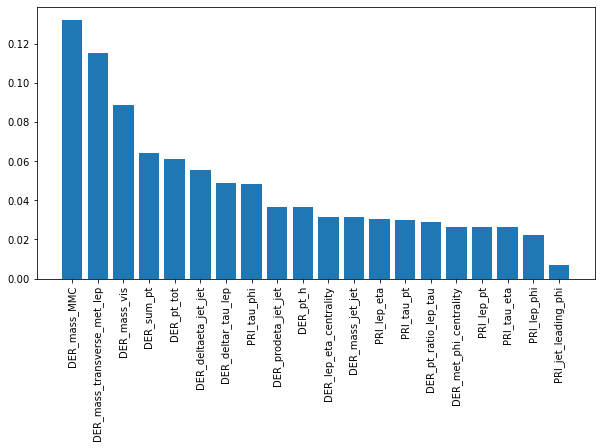

In [72]:
importances = Model_ran.feature_importances_

# indices des features les plus importantes
important_features = importances.argsort()[-20:][::-1]


plt.figure(figsize=(10, 5))
plt.bar(range(len(important_features)), importances[important_features])
plt.xticks(range(len(important_features)), [df.columns[i] for i in important_features], rotation=90)
plt.show()



Ce graphique permet d afficher les 20 variables les plus importantes pour la prédiction du modèle randomForest

## GradientBoostingClassifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# initialiser et entraîner le modèle
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_ro_train, y_ro_train)

# faire des prédictions sur les données de test
y_pred = gbc.predict(X_test)

# calculer la précision du modèle
acc = accuracy_score(y_test, y_pred)
print("La précision du modèle est de : {:.2f}".format(acc))

La précision du modèle est de : 0.81


              precision    recall  f1-score   support

           0       0.90      0.81      0.85    296317
           1       0.69      0.82      0.75    153683

    accuracy                           0.81    450000
   macro avg       0.79      0.82      0.80    450000
weighted avg       0.83      0.81      0.82    450000

[[240630  55687]
 [ 27754 125929]]
accuracy is 0.8145755555555556
Sur ce jeu de données, le taux de succès en classification moyen de : 0.8150629764086521


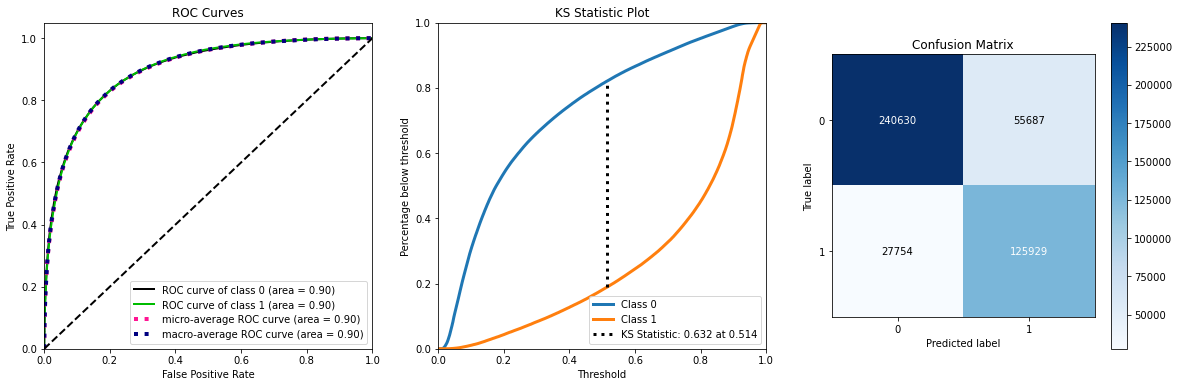

In [74]:

y_probas = gbc.predict_proba(X_test)
#y_pred = Model_ran.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

# Cross vcalidation
score = cross_val_score(gbc, X_ro_train, y_ro_train,cv=2)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())


fig, ax = plt.subplots(1, 3, figsize=(20,6))
skplt.metrics.plot_roc(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[1])

plt.show()

Les resultats obtenus grace au modèle de GradientBoostingClassifier sont tres proches de ceux obtenus grâce au RandomForest.  
Nous avons testé differents types de modeles pour ce projet, dont un Support Vector Classifier que nous avons du stopper après plus d 1heures. Les résultats de la regression logistique et du RandomForest sont les meilleurs que nous avons obtenus, pour un temps de processing raisonnable. C'est pourquoi nous poursuivrons avec ces deux types de modele pour la suite du projet.


Nous allons maintenant réaliser une analyse en composante principale pour voir si il est possible d améliorer notre modèle.

## Analyse en composantes principales

L'analyse en composantes principales (ACP)) est une technique de réduction de dimensionnalité utilisée pour transformer un ensemble de données ayant un grand nombre de caractéristiques en un ensemble de données de caractéristiques réduites mais  qui conservent le plus de variance possible des données d'origine.  
L'intérêt de faire une PCA avant de faire un modèle de classification est de réduire la complexité des données en éliminant les caractéristiques redondantes ou corrélées, ce qui peut améliorer les performances du modèle en réduisant l'overfitting et en accélérant les temps de calcul. La PCA peut également aider à visualiser les relations entre les données et à identifier des groupes ou des tendances cachés dans les données

In [75]:
from sklearn.decomposition import PCA

# On applique la pca sur notre echantillons réequilibré et normalisé
pca = PCA()
X_reduced = pca.fit(X_ro_train)

In [76]:
# création d un tableau permettant de'observer le % de variance conservé au sein de chaque dimension
eigenvalues = pca.explained_variance_
variances_explained = pca.explained_variance_ratio_
cumulative_variances_explained = np.cumsum(variances_explained)

pca_results = pd.DataFrame({'Dimension': range(1, len(eigenvalues)+1),
                           'eigenvalue': eigenvalues,
                           'variance %': ["{:.2%}".format(x) for x in variances_explained],
                           'variance % cumulée': ["{:.2%}".format(x) for x in cumulative_variances_explained]},
                           index=range(len(eigenvalues)))

pca_results = pca_results.reset_index(drop=True)
pca_results= pca_results.set_index("Dimension")
pca_results.head(10)


eigenvalue variance % variance % cumulée
Dimension                                          
1           14.456624     28.91%             28.91%
2            4.033412      8.07%             36.98%
3            3.633365      7.27%             44.25%
4            3.007875      6.02%             50.26%
5            2.471279      4.94%             55.20%
6            1.909160      3.82%             59.02%
7            1.890178      3.78%             62.80%
8            1.636540      3.27%             66.08%
9            1.374437      2.75%             68.83%
10           1.226452      2.45%             71.28%

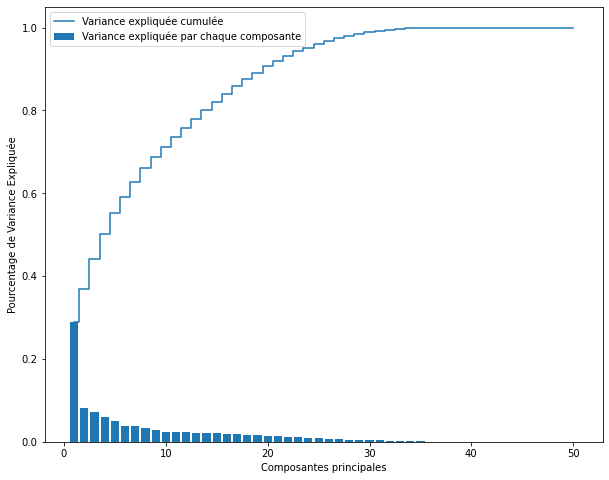

In [77]:
# création d un graphique permettant de'observer le % de variance conservé au sein de chaque dimension
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = [explained_variance[:i+1].sum() for i in range(len(explained_variance))]

plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_variance)+1), explained_variance, align='center', label='Variance expliquée par chaque composante')
plt.step(range(1, len(explained_variance)+1), cumulative_explained_variance, where='mid', label='Variance expliquée cumulée')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.show()

On voit par exemple que la première composante permet de conserver à elle seul 30% de la variance de notre jeu de données initiale et que la conservation de 10 dimensions contient 71% de la variance initiale

In [78]:
# afficher la table des contributions des variables à chaque composante principale
contributions = pd.DataFrame(pca.components_,columns=X_train.columns)
dimensions = [i+1 for i in range(pca.n_components_)]
contributions = contributions.assign(Dimension=dimensions)
contributions = contributions.set_index('Dimension')
contributions.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
Dimension                                                                      
1              0.010305                    -0.055201     -0.014429  0.193180   
2              0.020302                    -0.050322      0.004476  0.145174   
3              0.033909                     0.103500      0.044098  0.028147   
4              0.059373                     0.073562      0.036189  0.269361   
5              0.506218                     0.230414      0.557442 -0.061464   

           DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
Dimension                                                                     
1                   -0.124579    0.081078    0.220715              0.016314   
2                   -0.084680    0.031272    0.083636              0.013251   
3                   -0.014231    0.116104    0.065363              0.080168   
4                   -0.178990    0.127951    0.245592              0.056729   
5                    0.337023   -0.006367    0.045304              0.266316   

           DER_met_phi_centrality  PRI_tau_pt  ...  PRI_jet_sub_1  \
Dimension                                      ...                  
1                        0.134149    0.077096  ...       0.076721   
2                        0.172735    0.052270  ...      -0.070172   
3                       -0.076386    0.003332  ...      -0.189772   
4                       -0.011468    0.202092  ...       0.015607   
5                       -0.070092    0.035723  ...       0.021890   

           PRI_jet_sub_2  PRI_jet_sub_3  PRI_jet_leading_pt_0  \
Dimension                                                       
1               0.198698       0.075573             -0.186386   
2              -0.095735      -0.069223             -0.313656   
3               0.176439      -0.185733              0.083234   
4              -0.117014       0.012885              0.137016   
5              -0.004988       0.026555             -0.032298   

           PRI_jet_leading_pt_1  PRI_jet_leading_pt_2  PRI_jet_leading_eta_0  \
Dimension                                                                      
1                      0.064712              0.152712              -0.186372   
2                      0.266752              0.050475              -0.313640   
3                     -0.122908              0.054794               0.083257   
4                     -0.381944              0.325189               0.137014   
5                      0.096274             -0.084820              -0.032317   

           PRI_jet_leading_eta_1  PRI_jet_leading_eta_2  PRI_jet_leading_eta_3  
Dimension                                                                       
1                       0.022038               0.161217               0.020620  
2                       0.030675               0.273896               0.035405  
3                      -0.132055               0.039446              -0.132473  
4                      -0.050611              -0.085210              -0.054102  
5                       0.038209              -0.004552               0.040773  

[5 rows x 50 columns]

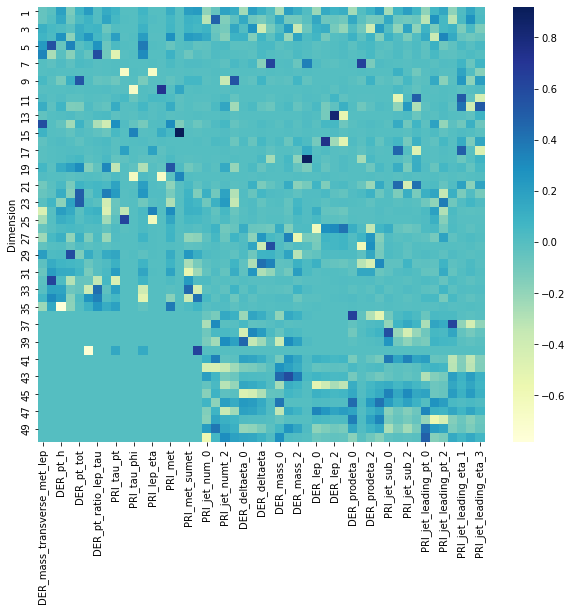

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(contributions.iloc[:,1:], cmap='YlGnBu')
plt.show()

Le tableau  et la heatmap  ci dessus permettent d'observer la contribution des variables aux dimensions, c'est a dire l'importance de chaque variable dans la définition des dimensions. La contribution est calculée en utilisant les valeurs propres associées à chaque dimension de l'ACP. Les valeurs propres sont calculées à partir de la matrice de corrélation des données d'entrée et plus la valeur propre associée à une dimension est élevée, plus la contribution de la variable correspondante est importante pour cette dimension. Citons pour exemple la variable DER_mass_vis dont la contribution de 0,56 pour la dimension 5 signifie qu elle explique à elle seule 56% de la variance de cette dimension. (la somme des contributions de toutes les variables pour une dimension est égale à 1).  
  
Lançons une ACP permettant de conserver 95% de la variance initiale de notre jeux de données:

In [80]:
# Création d une ACP conservant 90% de la variance )
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_ro_train)
X_reduced.shape

(171334, 24)

Nous voyons que l ACP a permis de concentrer 956% de notre variance sur seulement 24 dimensions, c'est plus de deux fois moins que notre dataset initial qui comportait après transformation 50 variables.  
  
On applique notre pca au données de test afin d'évaluer notre modèle après l ACP:

In [81]:
# Réalisation de l ACP sur nos données de test
X_test = pca.transform(X_test)

In [82]:
X_train= X_reduced
y_train=y_ro_train
X_train.shape, y_ro_train.shape

((171334, 24), (171334,))

Appliquons maintenant les deux types de modèles retenus à nos données projetées

## Regression Logistique 

In [83]:
from sklearn.linear_model import LogisticRegression


log_reg_ACP = LogisticRegression()

# définition des paramètres à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
gs = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# entraînement du modèle en utilisant les données d'entraînement
gs.fit(X_train, y_train)

# meilleurs paramètres
print("Meilleurs paramètres: ", gs.best_params_)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :", gs.best_score_)

Meilleurs paramètres:  {'C': 0.1, 'penalty': 'l2'}
Sur ce jeu de données, le taux de succès en classification moyen de : 0.7238727061690884


              precision    recall  f1-score   support

           0       0.84      0.72      0.77    296317
           1       0.57      0.73      0.64    153683

    accuracy                           0.72    450000
   macro avg       0.71      0.72      0.71    450000
weighted avg       0.75      0.72      0.73    450000

[[212702  83615]
 [ 41198 112485]]
accuracy is 0.7226377777777778


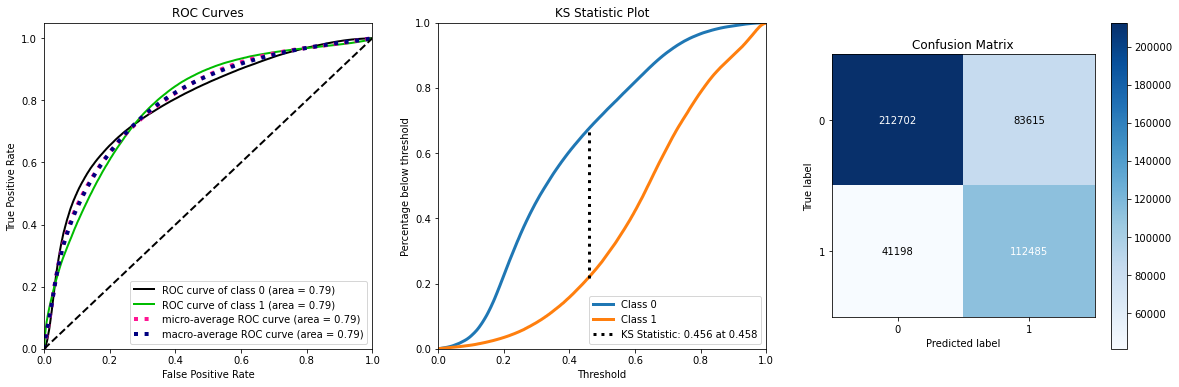

In [84]:
log_reg_ACP= gs.best_estimator_
log_reg_ACP.fit(X_train, y_train)

y_probas = log_reg_ACP.predict_proba(X_test)
y_pred = log_reg_ACP.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


fig, ax = plt.subplots(1, 3, figsize=(20,6))

skplt.metrics.plot_roc(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[1])

plt.show()
plt.show()

## RandomForest

              precision    recall  f1-score   support

           0       0.89      0.80      0.84    296317
           1       0.68      0.82      0.74    153683

    accuracy                           0.81    450000
   macro avg       0.79      0.81      0.79    450000
weighted avg       0.82      0.81      0.81    450000

[[236932  59385]
 [ 28349 125334]]
accuracy is 0.8050355555555555
Sur ce jeu de données, le taux de succès en classification moyen de : 0.8033665238656659


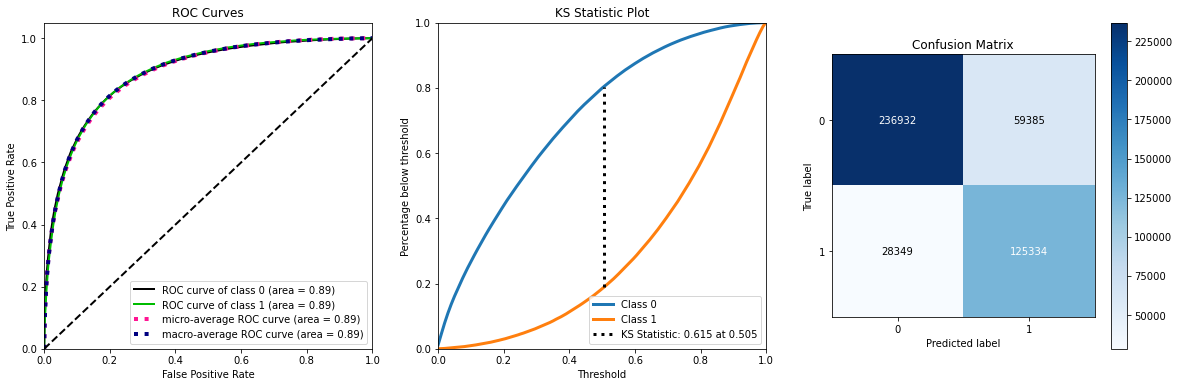

In [85]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier 

Model_ran_ACP=RandomForestClassifier(n_estimators=200)

Model_ran_ACP = Model_ran_ACP.fit(X_train, y_train)
y_probas = Model_ran_ACP.predict_proba(X_test)
y_pred = Model_ran_ACP.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))
score = cross_val_score(Model_ran_ACP, X_train, y_train,cv=2)

print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())

# figures
fig, ax = plt.subplots(1, 3, figsize=(20,6))
skplt.metrics.plot_roc(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[1])

plt.show()

On constate que notre modèle est très légerement moins bon apres l'ACP certainement parce que nous n 'avons conservé "que" 95% de la variance totale initiale de notre jeu de données.

# Evaluation de notre modèle Avec le score AMS:

## Préparation des données de validation

Nous appliquons maintenant la totalité des transformations appliquées à notre dastaset d'entrainement au dataset de validation.

In [86]:
df_validation= df_initial[df_initial.KaggleSet=="b"]
print(f"Le dataset de validation comprend {df_validation.shape[0]} lignes et {df_validation.shape[1]} colonnes.")

Le dataset de validation comprend 100000 lignes et 35 colonnes.


-   **Suppresion des colonnes inutiles**

In [87]:
df_val = df_validation.copy()
df_val.drop(["Weight","KaggleSet","KaggleWeight","EventId"], axis=1,inplace=True)

-   **Remplacement des valeurs abérrantes par des NaN**

In [88]:
# on remplace donc -999 par NaN
df_val=df_val.replace(-999,np.nan)

- **Traitement des colonnes interessantes : "cols2fill"**


In [89]:
df_val['DER_deltaeta_jet_jet'] = df_val['DER_deltaeta_jet_jet'].fillna(0)
df_val['DER_deltaeta_jet_jet'] = df_val['DER_deltaeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 3.8 else (2 if x < 7 else 3)))
DER_deltaeta= df_val['DER_deltaeta_jet_jet'].value_counts()

df_val['DER_mass_jet_jet'] = df_val['DER_mass_jet_jet'].fillna(0)
df_val['DER_mass_jet_jet'] = df_val['DER_mass_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < 550 else (2 if x < 2500 else 3)))
DER_mass = df_val['DER_mass_jet_jet'].value_counts()

df_val['DER_lep_eta_centrality'] = df_val['DER_lep_eta_centrality'].fillna(0)
df_val['DER_lep_eta_centrality'] = df_val['DER_lep_eta_centrality'].apply(lambda x: 0 if x == 0 else (1 if x < 0.7 else (2 if x < 0.9 else 3)))
DER_lep= df_val['DER_lep_eta_centrality'].value_counts()

df_val['DER_prodeta_jet_jet'] = df_val['DER_prodeta_jet_jet'].fillna(0)
df_val['DER_prodeta_jet_jet'] = df_val['DER_prodeta_jet_jet'].apply(lambda x: 0 if x == 0 else (1 if x < -13 else (2 if x < -4 else 3)))
DER_prodetta= df_val['DER_prodeta_jet_jet'].value_counts()

df_val['PRI_jet_subleading_eta'] = df_val['PRI_jet_subleading_eta'].fillna(0)
df_val['PRI_jet_subleading_eta'] = df_val['PRI_jet_subleading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.5 else (2 if x < 2.5 else 3)))
PRI_jet= df_val['PRI_jet_subleading_eta'].value_counts()

df_val['PRI_jet_leading_pt'] = df_val['PRI_jet_leading_pt'].fillna(0)
df_val['PRI_jet_leading_pt'] = df_val['PRI_jet_leading_pt'].apply(lambda x: 0 if x == 0 else (1 if x < 100 else 2))
PRI_jet_leading_p= df_val['PRI_jet_leading_pt'].value_counts()

df_val['PRI_jet_leading_eta'] = df_val['PRI_jet_leading_eta'].fillna(0)
df_val['PRI_jet_leading_eta'] = df_val['PRI_jet_leading_eta'].apply(lambda x: 0 if x == 0 else (1 if x < -2.6 else (2 if x < 2.6 else 3)))
PRI_jet_leading=df_val['PRI_jet_leading_eta'].value_counts()

df_value_counts = pd.DataFrame({'DER_deltaeta_jet_jet': DER_deltaeta,
                         'DER_mass_jet_jet': DER_mass,
                         'DER_lep_eta_centrality': DER_lep,
                         'DER_prodeta_jet_jet': DER_prodetta,
                         'PRI_jet_subleading_eta': PRI_jet,
                         'PRI_jet_leading_pt': PRI_jet_leading_p,
                         'PRI_jet_leading_eta': PRI_jet_leading})

                     
df_value_counts

DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_lep_eta_centrality  \
0                 70957             70954                   77262   
1                 22065             22949                   11612   
2                  6820              6031                    4518   
3                   158                66                    6608   

   DER_prodeta_jet_jet  PRI_jet_subleading_eta  PRI_jet_leading_pt  \
0                70976                   70962             40163.0   
1                   83                    3897             43920.0   
2                 4900                   21260             15917.0   
3                24041                    3881                 NaN   

   PRI_jet_leading_eta  
0                40174  
1                 4569  
2                50609  
3                 4648

- **Traitement des colonnes non désirées: "cols2drop**

In [90]:
df_val.drop(columns=cols2drop, inplace=True)

- **Transformation des label en binaire (0-1)**

In [91]:
# creation d'une fonction pour transformer le label en variable numérique
def label2numeric(x):
    """
    Fonction permetantt de transformer le label en variable numerique.
        - 0 pour le label bruit (b)
        - 1 pour le signal (s)
    """
    if x=="b":
        return(0)
    else:
        return(1)
    
    
# transformation de la variable de classe en variables numérique
df_val.Label= df_val.Label.apply(label2numeric)
df_val.Label.value_counts()

0    65975
1    34025
Name: Label, dtype: int64

- **Traitement des données manquantes de la variable DER_mass_MMC**

In [92]:
print("Nombre de valeurs manquantes pour la variable DER_mass_MMC dans le dataset de test:", df_val.DER_mass_MMC.isnull().sum())

Nombre de valeurs manquantes pour la variable DER_mass_MMC dans le dataset de test: 15075


In [93]:
# on groupe par  PRI_jet_num
group_jet= df_val.groupby("PRI_jet_num")

#On rempli les Nan avec la moyenne de chaque ctégorie de jet 0,1,2, et 
df_val["DER_mass_MMC"] = group_jet["DER_mass_MMC"].apply(lambda x: x.fillna(x.median()))


- **OneHotEncoding des variables**

In [94]:
ohe= OneHotEncoder(sparse= False)

ohe.fit(df_val[['PRI_jet_num']])
PRI_jet_num_encoded= ohe.transform(df_val[['PRI_jet_num']])
df_val['PRI_jet_num_0'],df_val['PRI_jet_num_1'],df_val['PRI_jet_numt_2'],df_val['PRI_jet_num_3']= PRI_jet_num_encoded.T

ohe.fit(df_val[['DER_deltaeta_jet_jet']])
DER_deltaeta_encoded= ohe.transform(df_val[['DER_deltaeta_jet_jet']])
df_val['DER_deltaeta_0'],df_val['DER_deltaeta_1'],df_val['DER_deltaeta'],df_val['DER_deltaeta_3']= DER_deltaeta_encoded.T

ohe.fit(df_val[['DER_mass_jet_jet']])
DER_mass_encoded= ohe.transform(df_val[['DER_mass_jet_jet']])
df_val['DER_mass_0'],df_val['DER_mass_1'],df_val['DER_mass_2'],df_val['DER_mass_3']= DER_mass_encoded.T

ohe.fit(df_val[['DER_lep_eta_centrality']])
DER_lep_num_encoded= ohe.transform(df_val[['DER_lep_eta_centrality']])
df_val['DER_lep_0'],df_val['DER_lep_1'],df_val['DER_lep_2'],df_val['DER_lep_3']= DER_lep_num_encoded.T

ohe.fit(df_val[['DER_prodeta_jet_jet']])
DER_prodeta_encoded= ohe.transform(df_val[['DER_prodeta_jet_jet']])
df_val['DER_prodeta_0'],df_val['DER_prodeta_1'],df_val['DER_prodeta_2'],df_val['DER_prodeta_3']= DER_prodeta_encoded.T

ohe.fit(df_val[['PRI_jet_subleading_eta']])
PRI_jet_sub_encoded= ohe.transform(df_val[['PRI_jet_subleading_eta']])
df_val['PRI_jet_sub_0'],df_val['PRI_jet_sub_1'],df_val['PRI_jet_sub_2'],df_val['PRI_jet_sub_3']= PRI_jet_sub_encoded.T

ohe.fit(df_val[['PRI_jet_leading_pt']])
PRI_jet_leading_pt_encoded= ohe.transform(df_val[['PRI_jet_leading_pt']])
df_val['PRI_jet_leading_pt_0'],df_val['PRI_jet_leading_pt_1'],df_val['PRI_jet_leading_pt_2']= PRI_jet_leading_pt_encoded.T

ohe.fit(df_val[['PRI_jet_leading_eta']])
PRI_jet_leading_eta_encoded= ohe.transform(df_val[['PRI_jet_leading_eta']])
df_val['PRI_jet_leading_eta_0'],df_val['PRI_jet_leading_eta_1'],df_val['PRI_jet_leading_eta_2'],df_val['PRI_jet_leading_eta_3']= PRI_jet_leading_eta_encoded.T


df_val= df_val.drop(["PRI_jet_num",'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_lep_eta_centrality','DER_prodeta_jet_jet','PRI_jet_subleading_eta',"PRI_jet_leading_pt","PRI_jet_leading_eta"], axis=1)

- **Selection des variables du model**


In [95]:
X_val= df_val.drop("Label", axis=1)
y_val= df_val["Label"] 
X_val.shape

(100000, 50)

- **Normalisation des données de test**


In [96]:
X_val = sc.transform(X_val)

Nous allons appliquer notre modele le plus performant (randomForest Classifier) sur les données de validation afin de mesurer le score AMS de celui ci.

## RandomForest Classifier

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     65975
           1       0.71      0.82      0.76     34025

    accuracy                           0.82    100000
   macro avg       0.80      0.82      0.81    100000
weighted avg       0.83      0.82      0.83    100000

[[54354 11621]
 [ 6042 27983]]
accuracy is 0.82337
Sur ce jeu de données, le taux de succès en classification moyen de : 0.8218975801650578


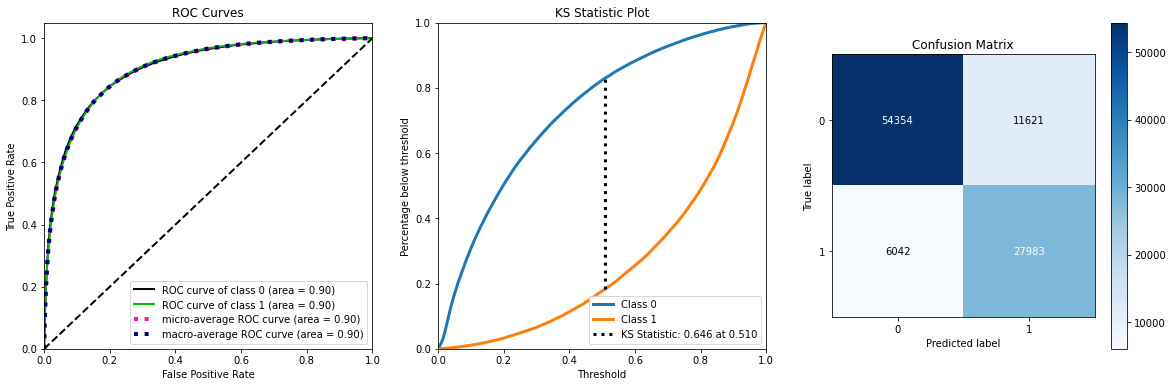

In [97]:
y_probas = Model_ran.predict_proba(X_val)
y_pred = Model_ran.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_val))

#Crossval score
score = cross_val_score(Model_ran, X_ro_train, y_ro_train,cv=2)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())

# figures
fig, ax = plt.subplots(1, 3, figsize=(20,6))
skplt.metrics.plot_roc(y_val, y_probas, ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_val, y_pred, ax=ax[2])
skplt.metrics.plot_ks_statistic(y_val, y_probas, ax=ax[1])

plt.show()

### Preparation de la table pour L'AMS

In [103]:
colsdrop= ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h",	"DER_deltaeta_jet_jet",	"DER_mass_jet_jet",
           "DER_prodeta_jet_jet",	"DER_deltar_tau_lep",	"DER_pt_tot","PRI_jet_leading_eta", "PRI_jet_leading_phi",
           "PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt","Weight","KaggleSet",
           "KaggleWeight","DER_sum_pt",	"DER_pt_ratio_lep_tau",	"DER_met_phi_centrality",	"DER_lep_eta_centrality",
           "PRI_tau_pt",	"PRI_tau_eta",	"PRI_tau_phi","PRI_lep_pt",	"PRI_lep_eta",	"PRI_lep_phi",	"PRI_met",
           "PRI_met_phi",	"PRI_met_sumet",	"PRI_jet_num",	"PRI_jet_leading_pt"] #supprimer toutes les colonnes sauf EventId et Label



In [99]:
df_prediction= df_validation.copy()
df_prediction.drop(columns=colsdrop, inplace=True)

In [100]:
# creation d'une fonction pour transformer le label en variable numérique
def label2numeric(x):
    """
    Fonction permetantt de transformer le label en variable numerique.
        - 0 pour le label bruit (b)
        - 1 pour le signal (s)
    """
    if x=="b":
        return(0)
    else:
        return(1)
    
    
# transformation de la variable de classe en variables numérique
df_prediction.Label= df_prediction.Label.apply(label2numeric)
df_prediction.Label.value_counts()

0    65975
1    34025
Name: Label, dtype: int64

In [101]:
df_prediction['Label_pred'] = y_pred.tolist()
df_prediction

EventId  Label  Label_pred
250000   350000      0           0
250008   350008      0           0
250017   350017      0           0
250027   350027      1           0
250032   350032      1           1
...         ...    ...         ...
799961   899961      1           1
799974   899974      0           0
799987   899987      0           1
799990   899990      0           0
799992   899992      1           1

[100000 rows x 3 columns]

In [102]:
import os
import csv
import math

signal = 0.0
background = 0.0

def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print ('radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)

for i in range(len(df_prediction)): 
    if df_prediction.iloc[i,2] == 1:
        if df_prediction.iloc[i,1] == 1:
            signal += df_prediction.iloc[i,2]
        elif df_prediction.iloc[i,1] == 0:
            background += df_prediction.iloc[i,2]

print ('signal = {0}, background = {1}'.format(signal, background))
print ('AMS = ' + str(AMS(signal, background)))

signal = 27983.0, background = 11621.0
AMS = 202.8018708721813


Pour effectuer notre calcul AMS nous  comparerons les valeurs prédites par notre modele aux valeurs réelles. C'est pour cela que nous avons créé un dataframe avec seulement 3 colonnes l'ID, la valeur réel et la valeur prédite. L'AMS tient compte  des nombres de vrai et faux positif pour realiser son calcul de scoring. Nous retrouvons donc les même nombres en sortie de calcul AMS que ceux affichés dans la matrice de confusion de notre modèle à savoir :  
- 27983 vrais positifs  
- 11621 faux positifs  
  
Notre score AMS est de 202,8